# An Extended Example: Tic-Tac-Toe

In this Notebook you will explore Monte Carlo algorithms applies to the game of tic tac toe

## Explore the game

Play against a random policy

In [1]:
import game
game = game.Game()

In [2]:
game.play()

    0   1   2

0   -   -   -   

1   -   -   -   

2   -   -   -   

Player's turn. Select a row and column in the format row,col:0,0
    0   1   2

0   X   -   -   

1   -   -   -   

2   -   -   -   

Opponent's turn.
    0   1   2

0   X   -   -   

1   -   -   -   

2   -   -   O   

Player's turn. Select a row and column in the format row,col:1,1
    0   1   2

0   X   -   -   

1   -   X   -   

2   -   -   O   

Opponent's turn.
    0   1   2

0   X   O   -   

1   -   X   -   

2   -   -   O   

Player's turn. Select a row and column in the format row,col:1,0
    0   1   2

0   X   O   -   

1   X   X   -   

2   -   -   O   

Opponent's turn.
    0   1   2

0   X   O   -   

1   X   X   -   

2   -   O   O   

Player's turn. Select a row and column in the format row,col:2,0
    0   1   2

0   X   O   -   

1   X   X   -   

2   X   O   O   

Game Over. Human player won!!


## Let's train a simple agent to play this game


Let's initialize an empty Q-table. A suitable data structure for the Q-table is the Python defaultdict.

In [3]:
from collections import defaultdict
Q = defaultdict(lambda: np.zeros(9))

And then let's initialize some parameters. You can later change the values of these parameters and see the impact on the learning results

In [4]:
alpha = 0.01
epsilon = 1

### Check how a game state is represented

Get the state representation of the final board of the previous game you played. All fields are concatenated into a string with no spaces. This will be the state representation in our Q-table later on.

After that reset the board, print it and get it's state representation.

In [5]:
game.get_state()

'XO-XX-XOO'

In [6]:
game.reset()
game.print_board()
game.get_state()

    0   1   2

0   -   -   -   

1   -   -   -   

2   -   -   -   



'---------'

### Write a function to select an epsilon-greedy action from the Q-table according to the current state

In [7]:
import random
import numpy as np

def select_action(state):
    if random.random() < epsilon:
        return random.choice(game.actions)
    else:
        return game.actions[np.argmax(Q[state])]

Test the select action function. Since epsilon is set to 1, the selected actions will be random for now.

In [8]:
select_action(game.get_state())

(2, 2)

### Write a function to update the Q-values according to the rewards received in the previous rollout

In [9]:
def step(state, action, reward, next_state):
    current = Q[state][game.actions.index(action)]
    Qsa_next = np.max(Q[next_state]) if next_state is not None else 0
    target = reward + Qsa_next
    Q[state][game.actions.index(action)] = current + alpha*(target - current)

### Train the agent

In [23]:
from collections import deque

def train_agent(num_episodes=10000, window=100, mode='random'):
    global epsilon
    avg_rewards = deque(maxlen=num_episodes)
    best_avg_reward = -float('inf')
    rewards = deque(maxlen=window)
    agent_key = 'X'
    opponent_key = 'O'
    
    for i in range(1, num_episodes + 1):
        game.reset()
        epsilon = epsilon/float(i)
        end = False
        reward = 0
        next_state = game.get_state()
        agents_turn = True if np.random.random() < 0.5 else False
        
        # One episode lasts until the game is over
        while True:
            state = next_state
            
            if agents_turn:
                agents_turn = not agents_turn
                action = select_action(state)
            
                # If the agent selects a spot that is already filled, penalize the action and terminate episode
                if action not in game.get_free_spots():
                    reward = -10
                    next_state = None
                    end = True
                # Terminate episode if agent wins, opponent wins, or if it's a draw
                else:
                    game.move(agent_key, action)
                    if game.check_for_win(agent_key):
                        reward = 5
                        next_state = None
                        end = True
                    elif game.check_for_draw():
                        reward = -1
                        next_state = None
                        end = True
            else:
                # Agent plays against a random policy
                agents_turn = not agents_turn
                game.move(opponent_key, mode='random')
            
                if game.check_for_win(opponent_key):
                    reward = -5
                    next_state = None
                    end = True
                elif game.check_for_draw():
                    reward = -1
                    next_state = None
                    end = True
                
            if end:
                rewards.append(reward)
                break
            
            next_state = game.get_state()

        step(state, action, reward, next_state)
        
        if i > 100:
            avg_reward = np.mean(rewards)
            avg_rewards.append(avg_reward)
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
            
            print "Episode {}/{} || Average Reward: {} || Best Average Reward{}".format(i, num_episodes, avg_reward, best_avg_reward)
        
    return avg_rewards

In [24]:
avg_rewards = train_agent(num_episodes=100000)

Episode 101/100000 || Average Reward: 1.34 || Best Average Reward1.34
Episode 102/100000 || Average Reward: 1.34 || Best Average Reward1.34
Episode 103/100000 || Average Reward: 1.44 || Best Average Reward1.44
Episode 104/100000 || Average Reward: 1.44 || Best Average Reward1.44
Episode 105/100000 || Average Reward: 1.34 || Best Average Reward1.44
Episode 106/100000 || Average Reward: 1.34 || Best Average Reward1.44
Episode 107/100000 || Average Reward: 1.44 || Best Average Reward1.44
Episode 108/100000 || Average Reward: 1.44 || Best Average Reward1.44
Episode 109/100000 || Average Reward: 1.54 || Best Average Reward1.54
Episode 110/100000 || Average Reward: 1.64 || Best Average Reward1.64
Episode 111/100000 || Average Reward: 1.64 || Best Average Reward1.64
Episode 112/100000 || Average Reward: 1.54 || Best Average Reward1.64
Episode 113/100000 || Average Reward: 1.54 || Best Average Reward1.64
Episode 114/100000 || Average Reward: 1.54 || Best Average Reward1.64
Episode 115/100000 |

Episode 718/100000 || Average Reward: 0.67 || Best Average Reward1.68
Episode 719/100000 || Average Reward: 0.57 || Best Average Reward1.68
Episode 720/100000 || Average Reward: 0.57 || Best Average Reward1.68
Episode 721/100000 || Average Reward: 0.57 || Best Average Reward1.68
Episode 722/100000 || Average Reward: 0.57 || Best Average Reward1.68
Episode 723/100000 || Average Reward: 0.47 || Best Average Reward1.68
Episode 724/100000 || Average Reward: 0.47 || Best Average Reward1.68
Episode 725/100000 || Average Reward: 0.47 || Best Average Reward1.68
Episode 726/100000 || Average Reward: 0.37 || Best Average Reward1.68
Episode 727/100000 || Average Reward: 0.37 || Best Average Reward1.68
Episode 728/100000 || Average Reward: 0.37 || Best Average Reward1.68
Episode 729/100000 || Average Reward: 0.37 || Best Average Reward1.68
Episode 730/100000 || Average Reward: 0.47 || Best Average Reward1.68
Episode 731/100000 || Average Reward: 0.37 || Best Average Reward1.68
Episode 732/100000 |

Episode 1364/100000 || Average Reward: 1.16 || Best Average Reward1.68
Episode 1365/100000 || Average Reward: 1.26 || Best Average Reward1.68
Episode 1366/100000 || Average Reward: 1.26 || Best Average Reward1.68
Episode 1367/100000 || Average Reward: 1.26 || Best Average Reward1.68
Episode 1368/100000 || Average Reward: 1.36 || Best Average Reward1.68
Episode 1369/100000 || Average Reward: 1.36 || Best Average Reward1.68
Episode 1370/100000 || Average Reward: 1.46 || Best Average Reward1.68
Episode 1371/100000 || Average Reward: 1.46 || Best Average Reward1.68
Episode 1372/100000 || Average Reward: 1.36 || Best Average Reward1.68
Episode 1373/100000 || Average Reward: 1.26 || Best Average Reward1.68
Episode 1374/100000 || Average Reward: 1.26 || Best Average Reward1.68
Episode 1375/100000 || Average Reward: 1.32 || Best Average Reward1.68
Episode 1376/100000 || Average Reward: 1.42 || Best Average Reward1.68
Episode 1377/100000 || Average Reward: 1.52 || Best Average Reward1.68
Episod

Episode 2098/100000 || Average Reward: 1.18 || Best Average Reward2.12
Episode 2099/100000 || Average Reward: 1.28 || Best Average Reward2.12
Episode 2100/100000 || Average Reward: 1.38 || Best Average Reward2.12
Episode 2101/100000 || Average Reward: 1.38 || Best Average Reward2.12
Episode 2102/100000 || Average Reward: 1.38 || Best Average Reward2.12
Episode 2103/100000 || Average Reward: 1.28 || Best Average Reward2.12
Episode 2104/100000 || Average Reward: 1.38 || Best Average Reward2.12
Episode 2105/100000 || Average Reward: 1.38 || Best Average Reward2.12
Episode 2106/100000 || Average Reward: 1.48 || Best Average Reward2.12
Episode 2107/100000 || Average Reward: 1.58 || Best Average Reward2.12
Episode 2108/100000 || Average Reward: 1.58 || Best Average Reward2.12
Episode 2109/100000 || Average Reward: 1.68 || Best Average Reward2.12
Episode 2110/100000 || Average Reward: 1.58 || Best Average Reward2.12
Episode 2111/100000 || Average Reward: 1.48 || Best Average Reward2.12
Episod

Episode 2835/100000 || Average Reward: 0.24 || Best Average Reward2.32
Episode 2836/100000 || Average Reward: 0.28 || Best Average Reward2.32
Episode 2837/100000 || Average Reward: 0.28 || Best Average Reward2.32
Episode 2838/100000 || Average Reward: 0.24 || Best Average Reward2.32
Episode 2839/100000 || Average Reward: 0.28 || Best Average Reward2.32
Episode 2840/100000 || Average Reward: 0.28 || Best Average Reward2.32
Episode 2841/100000 || Average Reward: 0.28 || Best Average Reward2.32
Episode 2842/100000 || Average Reward: 0.28 || Best Average Reward2.32
Episode 2843/100000 || Average Reward: 0.38 || Best Average Reward2.32
Episode 2844/100000 || Average Reward: 0.32 || Best Average Reward2.32
Episode 2845/100000 || Average Reward: 0.32 || Best Average Reward2.32
Episode 2846/100000 || Average Reward: 0.42 || Best Average Reward2.32
Episode 2847/100000 || Average Reward: 0.42 || Best Average Reward2.32
Episode 2848/100000 || Average Reward: 0.38 || Best Average Reward2.32
Episod

Episode 3582/100000 || Average Reward: 1.3 || Best Average Reward3.2
Episode 3583/100000 || Average Reward: 1.3 || Best Average Reward3.2
Episode 3584/100000 || Average Reward: 1.3 || Best Average Reward3.2
Episode 3585/100000 || Average Reward: 1.2 || Best Average Reward3.2
Episode 3586/100000 || Average Reward: 1.1 || Best Average Reward3.2
Episode 3587/100000 || Average Reward: 1.2 || Best Average Reward3.2
Episode 3588/100000 || Average Reward: 1.2 || Best Average Reward3.2
Episode 3589/100000 || Average Reward: 1.1 || Best Average Reward3.2
Episode 3590/100000 || Average Reward: 1.1 || Best Average Reward3.2
Episode 3591/100000 || Average Reward: 1.0 || Best Average Reward3.2
Episode 3592/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 3593/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 3594/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 3595/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 3596/100000 || Average

Episode 4278/100000 || Average Reward: 0.86 || Best Average Reward3.2
Episode 4279/100000 || Average Reward: 0.86 || Best Average Reward3.2
Episode 4280/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 4281/100000 || Average Reward: 0.86 || Best Average Reward3.2
Episode 4282/100000 || Average Reward: 0.76 || Best Average Reward3.2
Episode 4283/100000 || Average Reward: 0.66 || Best Average Reward3.2
Episode 4284/100000 || Average Reward: 0.56 || Best Average Reward3.2
Episode 4285/100000 || Average Reward: 0.66 || Best Average Reward3.2
Episode 4286/100000 || Average Reward: 0.56 || Best Average Reward3.2
Episode 4287/100000 || Average Reward: 0.56 || Best Average Reward3.2
Episode 4288/100000 || Average Reward: 0.46 || Best Average Reward3.2
Episode 4289/100000 || Average Reward: 0.56 || Best Average Reward3.2
Episode 4290/100000 || Average Reward: 0.56 || Best Average Reward3.2
Episode 4291/100000 || Average Reward: 0.52 || Best Average Reward3.2
Episode 4292/100000 

Episode 5009/100000 || Average Reward: 1.12 || Best Average Reward3.2
Episode 5010/100000 || Average Reward: 1.02 || Best Average Reward3.2
Episode 5011/100000 || Average Reward: 1.08 || Best Average Reward3.2
Episode 5012/100000 || Average Reward: 1.18 || Best Average Reward3.2
Episode 5013/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 5014/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 5015/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 5016/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 5017/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 5018/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 5019/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 5020/100000 || Average Reward: 1.18 || Best Average Reward3.2
Episode 5021/100000 || Average Reward: 1.08 || Best Average Reward3.2
Episode 5022/100000 || Average Reward: 0.98 || Best Average Reward3.2
Episode 5023/100000 

Episode 5629/100000 || Average Reward: 0.87 || Best Average Reward3.2
Episode 5630/100000 || Average Reward: 0.87 || Best Average Reward3.2
Episode 5631/100000 || Average Reward: 0.77 || Best Average Reward3.2
Episode 5632/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 5633/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 5634/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 5635/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 5636/100000 || Average Reward: 0.57 || Best Average Reward3.2
Episode 5637/100000 || Average Reward: 0.57 || Best Average Reward3.2
Episode 5638/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 5639/100000 || Average Reward: 0.61 || Best Average Reward3.2
Episode 5640/100000 || Average Reward: 0.61 || Best Average Reward3.2
Episode 5641/100000 || Average Reward: 0.61 || Best Average Reward3.2
Episode 5642/100000 || Average Reward: 0.61 || Best Average Reward3.2
Episode 5643/100000 

Episode 6069/100000 || Average Reward: 0.78 || Best Average Reward3.2
Episode 6070/100000 || Average Reward: 0.88 || Best Average Reward3.2
Episode 6071/100000 || Average Reward: 0.78 || Best Average Reward3.2
Episode 6072/100000 || Average Reward: 0.68 || Best Average Reward3.2
Episode 6073/100000 || Average Reward: 0.68 || Best Average Reward3.2
Episode 6074/100000 || Average Reward: 0.58 || Best Average Reward3.2
Episode 6075/100000 || Average Reward: 0.58 || Best Average Reward3.2
Episode 6076/100000 || Average Reward: 0.58 || Best Average Reward3.2
Episode 6077/100000 || Average Reward: 0.58 || Best Average Reward3.2
Episode 6078/100000 || Average Reward: 0.58 || Best Average Reward3.2
Episode 6079/100000 || Average Reward: 0.58 || Best Average Reward3.2
Episode 6080/100000 || Average Reward: 0.58 || Best Average Reward3.2
Episode 6081/100000 || Average Reward: 0.54 || Best Average Reward3.2
Episode 6082/100000 || Average Reward: 0.54 || Best Average Reward3.2
Episode 6083/100000 

Episode 6394/100000 || Average Reward: 0.94 || Best Average Reward3.2
Episode 6395/100000 || Average Reward: 0.94 || Best Average Reward3.2
Episode 6396/100000 || Average Reward: 0.94 || Best Average Reward3.2
Episode 6397/100000 || Average Reward: 0.94 || Best Average Reward3.2
Episode 6398/100000 || Average Reward: 0.94 || Best Average Reward3.2
Episode 6399/100000 || Average Reward: 0.94 || Best Average Reward3.2
Episode 6400/100000 || Average Reward: 0.94 || Best Average Reward3.2
Episode 6401/100000 || Average Reward: 0.84 || Best Average Reward3.2
Episode 6402/100000 || Average Reward: 0.74 || Best Average Reward3.2
Episode 6403/100000 || Average Reward: 0.74 || Best Average Reward3.2
Episode 6404/100000 || Average Reward: 0.74 || Best Average Reward3.2
Episode 6405/100000 || Average Reward: 0.64 || Best Average Reward3.2
Episode 6406/100000 || Average Reward: 0.74 || Best Average Reward3.2
Episode 6407/100000 || Average Reward: 0.84 || Best Average Reward3.2
Episode 6408/100000 

Episode 6920/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 6921/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 6922/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 6923/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 6924/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 6925/100000 || Average Reward: 1.39 || Best Average Reward3.2
Episode 6926/100000 || Average Reward: 1.39 || Best Average Reward3.2
Episode 6927/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 6928/100000 || Average Reward: 1.39 || Best Average Reward3.2
Episode 6929/100000 || Average Reward: 1.39 || Best Average Reward3.2
Episode 6930/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 6931/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 6932/100000 || Average Reward: 1.23 || Best Average Reward3.2
Episode 6933/100000 || Average Reward: 1.13 || Best Average Reward3.2
Episode 6934/100000 

Episode 7593/100000 || Average Reward: 2.09 || Best Average Reward3.2
Episode 7594/100000 || Average Reward: 1.99 || Best Average Reward3.2
Episode 7595/100000 || Average Reward: 2.09 || Best Average Reward3.2
Episode 7596/100000 || Average Reward: 2.09 || Best Average Reward3.2
Episode 7597/100000 || Average Reward: 1.99 || Best Average Reward3.2
Episode 7598/100000 || Average Reward: 2.09 || Best Average Reward3.2
Episode 7599/100000 || Average Reward: 2.19 || Best Average Reward3.2
Episode 7600/100000 || Average Reward: 2.19 || Best Average Reward3.2
Episode 7601/100000 || Average Reward: 2.19 || Best Average Reward3.2
Episode 7602/100000 || Average Reward: 2.19 || Best Average Reward3.2
Episode 7603/100000 || Average Reward: 2.29 || Best Average Reward3.2
Episode 7604/100000 || Average Reward: 2.19 || Best Average Reward3.2
Episode 7605/100000 || Average Reward: 2.19 || Best Average Reward3.2
Episode 7606/100000 || Average Reward: 2.19 || Best Average Reward3.2
Episode 7607/100000 

Episode 8270/100000 || Average Reward: 1.08 || Best Average Reward3.2
Episode 8271/100000 || Average Reward: 0.98 || Best Average Reward3.2
Episode 8272/100000 || Average Reward: 0.98 || Best Average Reward3.2
Episode 8273/100000 || Average Reward: 1.08 || Best Average Reward3.2
Episode 8274/100000 || Average Reward: 1.08 || Best Average Reward3.2
Episode 8275/100000 || Average Reward: 1.08 || Best Average Reward3.2
Episode 8276/100000 || Average Reward: 0.98 || Best Average Reward3.2
Episode 8277/100000 || Average Reward: 0.88 || Best Average Reward3.2
Episode 8278/100000 || Average Reward: 0.88 || Best Average Reward3.2
Episode 8279/100000 || Average Reward: 0.88 || Best Average Reward3.2
Episode 8280/100000 || Average Reward: 0.78 || Best Average Reward3.2
Episode 8281/100000 || Average Reward: 0.72 || Best Average Reward3.2
Episode 8282/100000 || Average Reward: 0.72 || Best Average Reward3.2
Episode 8283/100000 || Average Reward: 0.72 || Best Average Reward3.2
Episode 8284/100000 

Episode 8986/100000 || Average Reward: 1.73 || Best Average Reward3.2
Episode 8987/100000 || Average Reward: 1.63 || Best Average Reward3.2
Episode 8988/100000 || Average Reward: 1.63 || Best Average Reward3.2
Episode 8989/100000 || Average Reward: 1.73 || Best Average Reward3.2
Episode 8990/100000 || Average Reward: 1.83 || Best Average Reward3.2
Episode 8991/100000 || Average Reward: 1.73 || Best Average Reward3.2
Episode 8992/100000 || Average Reward: 1.73 || Best Average Reward3.2
Episode 8993/100000 || Average Reward: 1.73 || Best Average Reward3.2
Episode 8994/100000 || Average Reward: 1.73 || Best Average Reward3.2
Episode 8995/100000 || Average Reward: 1.63 || Best Average Reward3.2
Episode 8996/100000 || Average Reward: 1.53 || Best Average Reward3.2
Episode 8997/100000 || Average Reward: 1.63 || Best Average Reward3.2
Episode 8998/100000 || Average Reward: 1.63 || Best Average Reward3.2
Episode 8999/100000 || Average Reward: 1.63 || Best Average Reward3.2
Episode 9000/100000 

Episode 9755/100000 || Average Reward: 1.48 || Best Average Reward3.2
Episode 9756/100000 || Average Reward: 1.48 || Best Average Reward3.2
Episode 9757/100000 || Average Reward: 1.38 || Best Average Reward3.2
Episode 9758/100000 || Average Reward: 1.48 || Best Average Reward3.2
Episode 9759/100000 || Average Reward: 1.44 || Best Average Reward3.2
Episode 9760/100000 || Average Reward: 1.44 || Best Average Reward3.2
Episode 9761/100000 || Average Reward: 1.38 || Best Average Reward3.2
Episode 9762/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 9763/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 9764/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 9765/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 9766/100000 || Average Reward: 1.32 || Best Average Reward3.2
Episode 9767/100000 || Average Reward: 1.42 || Best Average Reward3.2
Episode 9768/100000 || Average Reward: 1.42 || Best Average Reward3.2
Episode 9769/100000 

Episode 10431/100000 || Average Reward: 0.75 || Best Average Reward3.2
Episode 10432/100000 || Average Reward: 0.85 || Best Average Reward3.2
Episode 10433/100000 || Average Reward: 0.95 || Best Average Reward3.2
Episode 10434/100000 || Average Reward: 1.05 || Best Average Reward3.2
Episode 10435/100000 || Average Reward: 1.05 || Best Average Reward3.2
Episode 10436/100000 || Average Reward: 1.15 || Best Average Reward3.2
Episode 10437/100000 || Average Reward: 1.15 || Best Average Reward3.2
Episode 10438/100000 || Average Reward: 1.15 || Best Average Reward3.2
Episode 10439/100000 || Average Reward: 1.05 || Best Average Reward3.2
Episode 10440/100000 || Average Reward: 1.05 || Best Average Reward3.2
Episode 10441/100000 || Average Reward: 1.15 || Best Average Reward3.2
Episode 10442/100000 || Average Reward: 1.15 || Best Average Reward3.2
Episode 10443/100000 || Average Reward: 1.05 || Best Average Reward3.2
Episode 10444/100000 || Average Reward: 1.05 || Best Average Reward3.2
Episod

Episode 11170/100000 || Average Reward: 0.65 || Best Average Reward3.2
Episode 11171/100000 || Average Reward: 0.75 || Best Average Reward3.2
Episode 11172/100000 || Average Reward: 0.81 || Best Average Reward3.2
Episode 11173/100000 || Average Reward: 0.77 || Best Average Reward3.2
Episode 11174/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 11175/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 11176/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 11177/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 11178/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 11179/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 11180/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 11181/100000 || Average Reward: 0.63 || Best Average Reward3.2
Episode 11182/100000 || Average Reward: 0.63 || Best Average Reward3.2
Episode 11183/100000 || Average Reward: 0.73 || Best Average Reward3.2
Episod

Episode 11940/100000 || Average Reward: 0.97 || Best Average Reward3.2
Episode 11941/100000 || Average Reward: 0.97 || Best Average Reward3.2
Episode 11942/100000 || Average Reward: 0.87 || Best Average Reward3.2
Episode 11943/100000 || Average Reward: 1.02 || Best Average Reward3.2
Episode 11944/100000 || Average Reward: 1.12 || Best Average Reward3.2
Episode 11945/100000 || Average Reward: 1.12 || Best Average Reward3.2
Episode 11946/100000 || Average Reward: 1.02 || Best Average Reward3.2
Episode 11947/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 11948/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 11949/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 11950/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 11951/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episode 11952/100000 || Average Reward: 0.86 || Best Average Reward3.2
Episode 11953/100000 || Average Reward: 0.96 || Best Average Reward3.2
Episod

Episode 12686/100000 || Average Reward: 2.03 || Best Average Reward3.2
Episode 12687/100000 || Average Reward: 2.03 || Best Average Reward3.2
Episode 12688/100000 || Average Reward: 2.03 || Best Average Reward3.2
Episode 12689/100000 || Average Reward: 2.03 || Best Average Reward3.2
Episode 12690/100000 || Average Reward: 2.03 || Best Average Reward3.2
Episode 12691/100000 || Average Reward: 2.03 || Best Average Reward3.2
Episode 12692/100000 || Average Reward: 1.93 || Best Average Reward3.2
Episode 12693/100000 || Average Reward: 1.93 || Best Average Reward3.2
Episode 12694/100000 || Average Reward: 2.03 || Best Average Reward3.2
Episode 12695/100000 || Average Reward: 2.03 || Best Average Reward3.2
Episode 12696/100000 || Average Reward: 2.03 || Best Average Reward3.2
Episode 12697/100000 || Average Reward: 2.13 || Best Average Reward3.2
Episode 12698/100000 || Average Reward: 2.13 || Best Average Reward3.2
Episode 12699/100000 || Average Reward: 2.13 || Best Average Reward3.2
Episod

Episode 13463/100000 || Average Reward: 1.26 || Best Average Reward3.2
Episode 13464/100000 || Average Reward: 1.26 || Best Average Reward3.2
Episode 13465/100000 || Average Reward: 1.16 || Best Average Reward3.2
Episode 13466/100000 || Average Reward: 1.16 || Best Average Reward3.2
Episode 13467/100000 || Average Reward: 1.16 || Best Average Reward3.2
Episode 13468/100000 || Average Reward: 1.16 || Best Average Reward3.2
Episode 13469/100000 || Average Reward: 1.16 || Best Average Reward3.2
Episode 13470/100000 || Average Reward: 1.2 || Best Average Reward3.2
Episode 13471/100000 || Average Reward: 1.1 || Best Average Reward3.2
Episode 13472/100000 || Average Reward: 1.1 || Best Average Reward3.2
Episode 13473/100000 || Average Reward: 1.1 || Best Average Reward3.2
Episode 13474/100000 || Average Reward: 1.0 || Best Average Reward3.2
Episode 13475/100000 || Average Reward: 0.9 || Best Average Reward3.2
Episode 13476/100000 || Average Reward: 0.9 || Best Average Reward3.2
Episode 13477

Episode 14116/100000 || Average Reward: 0.97 || Best Average Reward3.2
Episode 14117/100000 || Average Reward: 1.07 || Best Average Reward3.2
Episode 14118/100000 || Average Reward: 1.07 || Best Average Reward3.2
Episode 14119/100000 || Average Reward: 1.07 || Best Average Reward3.2
Episode 14120/100000 || Average Reward: 1.07 || Best Average Reward3.2
Episode 14121/100000 || Average Reward: 1.17 || Best Average Reward3.2
Episode 14122/100000 || Average Reward: 1.17 || Best Average Reward3.2
Episode 14123/100000 || Average Reward: 1.17 || Best Average Reward3.2
Episode 14124/100000 || Average Reward: 1.17 || Best Average Reward3.2
Episode 14125/100000 || Average Reward: 1.17 || Best Average Reward3.2
Episode 14126/100000 || Average Reward: 1.07 || Best Average Reward3.2
Episode 14127/100000 || Average Reward: 1.07 || Best Average Reward3.2
Episode 14128/100000 || Average Reward: 1.07 || Best Average Reward3.2
Episode 14129/100000 || Average Reward: 1.01 || Best Average Reward3.2
Episod

Episode 14866/100000 || Average Reward: 1.72 || Best Average Reward3.2
Episode 14867/100000 || Average Reward: 1.62 || Best Average Reward3.2
Episode 14868/100000 || Average Reward: 1.52 || Best Average Reward3.2
Episode 14869/100000 || Average Reward: 1.52 || Best Average Reward3.2
Episode 14870/100000 || Average Reward: 1.62 || Best Average Reward3.2
Episode 14871/100000 || Average Reward: 1.62 || Best Average Reward3.2
Episode 14872/100000 || Average Reward: 1.62 || Best Average Reward3.2
Episode 14873/100000 || Average Reward: 1.62 || Best Average Reward3.2
Episode 14874/100000 || Average Reward: 1.52 || Best Average Reward3.2
Episode 14875/100000 || Average Reward: 1.52 || Best Average Reward3.2
Episode 14876/100000 || Average Reward: 1.52 || Best Average Reward3.2
Episode 14877/100000 || Average Reward: 1.52 || Best Average Reward3.2
Episode 14878/100000 || Average Reward: 1.52 || Best Average Reward3.2
Episode 14879/100000 || Average Reward: 1.42 || Best Average Reward3.2
Episod

Episode 15597/100000 || Average Reward: 2.14 || Best Average Reward3.2
Episode 15598/100000 || Average Reward: 2.08 || Best Average Reward3.2
Episode 15599/100000 || Average Reward: 2.08 || Best Average Reward3.2
Episode 15600/100000 || Average Reward: 2.18 || Best Average Reward3.2
Episode 15601/100000 || Average Reward: 2.18 || Best Average Reward3.2
Episode 15602/100000 || Average Reward: 2.28 || Best Average Reward3.2
Episode 15603/100000 || Average Reward: 2.18 || Best Average Reward3.2
Episode 15604/100000 || Average Reward: 2.18 || Best Average Reward3.2
Episode 15605/100000 || Average Reward: 2.18 || Best Average Reward3.2
Episode 15606/100000 || Average Reward: 2.08 || Best Average Reward3.2
Episode 15607/100000 || Average Reward: 2.08 || Best Average Reward3.2
Episode 15608/100000 || Average Reward: 2.08 || Best Average Reward3.2
Episode 15609/100000 || Average Reward: 2.08 || Best Average Reward3.2
Episode 15610/100000 || Average Reward: 1.98 || Best Average Reward3.2
Episod

Episode 16365/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 16366/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 16367/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 16368/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 16369/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 16370/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 16371/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 16372/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 16373/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 16374/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 16375/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 16376/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 16377/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 16378/100000 || Average Reward: 1.39 || Best Average Reward3.2
Episod

Episode 17140/100000 || Average Reward: 0.75 || Best Average Reward3.2
Episode 17141/100000 || Average Reward: 0.65 || Best Average Reward3.2
Episode 17142/100000 || Average Reward: 0.75 || Best Average Reward3.2
Episode 17143/100000 || Average Reward: 0.75 || Best Average Reward3.2
Episode 17144/100000 || Average Reward: 0.65 || Best Average Reward3.2
Episode 17145/100000 || Average Reward: 0.61 || Best Average Reward3.2
Episode 17146/100000 || Average Reward: 0.71 || Best Average Reward3.2
Episode 17147/100000 || Average Reward: 0.71 || Best Average Reward3.2
Episode 17148/100000 || Average Reward: 0.71 || Best Average Reward3.2
Episode 17149/100000 || Average Reward: 0.71 || Best Average Reward3.2
Episode 17150/100000 || Average Reward: 0.81 || Best Average Reward3.2
Episode 17151/100000 || Average Reward: 0.71 || Best Average Reward3.2
Episode 17152/100000 || Average Reward: 0.71 || Best Average Reward3.2
Episode 17153/100000 || Average Reward: 0.71 || Best Average Reward3.2
Episod

Episode 17861/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 17862/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 17863/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 17864/100000 || Average Reward: 1.19 || Best Average Reward3.2
Episode 17865/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 17866/100000 || Average Reward: 1.29 || Best Average Reward3.2
Episode 17867/100000 || Average Reward: 1.34 || Best Average Reward3.2
Episode 17868/100000 || Average Reward: 1.24 || Best Average Reward3.2
Episode 17869/100000 || Average Reward: 1.24 || Best Average Reward3.2
Episode 17870/100000 || Average Reward: 1.24 || Best Average Reward3.2
Episode 17871/100000 || Average Reward: 1.14 || Best Average Reward3.2
Episode 17872/100000 || Average Reward: 1.24 || Best Average Reward3.2
Episode 17873/100000 || Average Reward: 1.18 || Best Average Reward3.2
Episode 17874/100000 || Average Reward: 1.18 || Best Average Reward3.2
Episod

Episode 18662/100000 || Average Reward: 0.82 || Best Average Reward3.2
Episode 18663/100000 || Average Reward: 0.82 || Best Average Reward3.2
Episode 18664/100000 || Average Reward: 0.92 || Best Average Reward3.2
Episode 18665/100000 || Average Reward: 0.92 || Best Average Reward3.2
Episode 18666/100000 || Average Reward: 0.82 || Best Average Reward3.2
Episode 18667/100000 || Average Reward: 0.92 || Best Average Reward3.2
Episode 18668/100000 || Average Reward: 1.02 || Best Average Reward3.2
Episode 18669/100000 || Average Reward: 1.02 || Best Average Reward3.2
Episode 18670/100000 || Average Reward: 1.02 || Best Average Reward3.2
Episode 18671/100000 || Average Reward: 1.02 || Best Average Reward3.2
Episode 18672/100000 || Average Reward: 1.12 || Best Average Reward3.2
Episode 18673/100000 || Average Reward: 1.02 || Best Average Reward3.2
Episode 18674/100000 || Average Reward: 1.12 || Best Average Reward3.2
Episode 18675/100000 || Average Reward: 1.02 || Best Average Reward3.2
Episod

Episode 19369/100000 || Average Reward: 0.44 || Best Average Reward3.2
Episode 19370/100000 || Average Reward: 0.44 || Best Average Reward3.2
Episode 19371/100000 || Average Reward: 0.44 || Best Average Reward3.2
Episode 19372/100000 || Average Reward: 0.54 || Best Average Reward3.2
Episode 19373/100000 || Average Reward: 0.64 || Best Average Reward3.2
Episode 19374/100000 || Average Reward: 0.74 || Best Average Reward3.2
Episode 19375/100000 || Average Reward: 0.84 || Best Average Reward3.2
Episode 19376/100000 || Average Reward: 0.88 || Best Average Reward3.2
Episode 19377/100000 || Average Reward: 0.98 || Best Average Reward3.2
Episode 19378/100000 || Average Reward: 0.98 || Best Average Reward3.2
Episode 19379/100000 || Average Reward: 0.88 || Best Average Reward3.2
Episode 19380/100000 || Average Reward: 0.88 || Best Average Reward3.2
Episode 19381/100000 || Average Reward: 0.88 || Best Average Reward3.2
Episode 19382/100000 || Average Reward: 0.78 || Best Average Reward3.2
Episod

Episode 20074/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20075/100000 || Average Reward: 2.15 || Best Average Reward3.2
Episode 20076/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20077/100000 || Average Reward: 1.95 || Best Average Reward3.2
Episode 20078/100000 || Average Reward: 1.95 || Best Average Reward3.2
Episode 20079/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20080/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20081/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20082/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20083/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20084/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20085/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20086/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episode 20087/100000 || Average Reward: 2.05 || Best Average Reward3.2
Episod

Episode 20839/100000 || Average Reward: 1.31 || Best Average Reward3.2
Episode 20840/100000 || Average Reward: 1.21 || Best Average Reward3.2
Episode 20841/100000 || Average Reward: 1.21 || Best Average Reward3.2
Episode 20842/100000 || Average Reward: 1.31 || Best Average Reward3.2
Episode 20843/100000 || Average Reward: 1.31 || Best Average Reward3.2
Episode 20844/100000 || Average Reward: 1.21 || Best Average Reward3.2
Episode 20845/100000 || Average Reward: 1.11 || Best Average Reward3.2
Episode 20846/100000 || Average Reward: 1.11 || Best Average Reward3.2
Episode 20847/100000 || Average Reward: 1.11 || Best Average Reward3.2
Episode 20848/100000 || Average Reward: 1.21 || Best Average Reward3.2
Episode 20849/100000 || Average Reward: 1.21 || Best Average Reward3.2
Episode 20850/100000 || Average Reward: 1.21 || Best Average Reward3.2
Episode 20851/100000 || Average Reward: 1.31 || Best Average Reward3.2
Episode 20852/100000 || Average Reward: 1.31 || Best Average Reward3.2
Episod

Episode 21473/100000 || Average Reward: 1.17 || Best Average Reward3.2
Episode 21474/100000 || Average Reward: 1.17 || Best Average Reward3.2
Episode 21475/100000 || Average Reward: 1.27 || Best Average Reward3.2
Episode 21476/100000 || Average Reward: 1.37 || Best Average Reward3.2
Episode 21477/100000 || Average Reward: 1.47 || Best Average Reward3.2
Episode 21478/100000 || Average Reward: 1.47 || Best Average Reward3.2
Episode 21479/100000 || Average Reward: 1.47 || Best Average Reward3.2
Episode 21480/100000 || Average Reward: 1.43 || Best Average Reward3.2
Episode 21481/100000 || Average Reward: 1.38 || Best Average Reward3.2
Episode 21482/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 21483/100000 || Average Reward: 1.38 || Best Average Reward3.2
Episode 21484/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 21485/100000 || Average Reward: 1.28 || Best Average Reward3.2
Episode 21486/100000 || Average Reward: 1.38 || Best Average Reward3.2
Episod

Episode 21939/100000 || Average Reward: 2.26 || Best Average Reward3.2
Episode 21940/100000 || Average Reward: 2.16 || Best Average Reward3.2
Episode 21941/100000 || Average Reward: 2.16 || Best Average Reward3.2
Episode 21942/100000 || Average Reward: 2.16 || Best Average Reward3.2
Episode 21943/100000 || Average Reward: 2.26 || Best Average Reward3.2
Episode 21944/100000 || Average Reward: 2.26 || Best Average Reward3.2
Episode 21945/100000 || Average Reward: 2.16 || Best Average Reward3.2
Episode 21946/100000 || Average Reward: 2.16 || Best Average Reward3.2
Episode 21947/100000 || Average Reward: 2.16 || Best Average Reward3.2
Episode 21948/100000 || Average Reward: 2.1 || Best Average Reward3.2
Episode 21949/100000 || Average Reward: 2.1 || Best Average Reward3.2
Episode 21950/100000 || Average Reward: 2.1 || Best Average Reward3.2
Episode 21951/100000 || Average Reward: 2.2 || Best Average Reward3.2
Episode 21952/100000 || Average Reward: 2.2 || Best Average Reward3.2
Episode 219

Episode 22458/100000 || Average Reward: 1.04 || Best Average Reward3.2
Episode 22459/100000 || Average Reward: 1.14 || Best Average Reward3.2
Episode 22460/100000 || Average Reward: 1.14 || Best Average Reward3.2
Episode 22461/100000 || Average Reward: 1.24 || Best Average Reward3.2
Episode 22462/100000 || Average Reward: 1.24 || Best Average Reward3.2
Episode 22463/100000 || Average Reward: 1.24 || Best Average Reward3.2
Episode 22464/100000 || Average Reward: 1.34 || Best Average Reward3.2
Episode 22465/100000 || Average Reward: 1.44 || Best Average Reward3.2
Episode 22466/100000 || Average Reward: 1.44 || Best Average Reward3.2
Episode 22467/100000 || Average Reward: 1.44 || Best Average Reward3.2
Episode 22468/100000 || Average Reward: 1.44 || Best Average Reward3.2
Episode 22469/100000 || Average Reward: 1.44 || Best Average Reward3.2
Episode 22470/100000 || Average Reward: 1.34 || Best Average Reward3.2
Episode 22471/100000 || Average Reward: 1.4 || Best Average Reward3.2
Episode

Episode 23141/100000 || Average Reward: 0.76 || Best Average Reward3.2
Episode 23142/100000 || Average Reward: 0.76 || Best Average Reward3.2
Episode 23143/100000 || Average Reward: 0.86 || Best Average Reward3.2
Episode 23144/100000 || Average Reward: 0.76 || Best Average Reward3.2
Episode 23145/100000 || Average Reward: 0.86 || Best Average Reward3.2
Episode 23146/100000 || Average Reward: 0.76 || Best Average Reward3.2
Episode 23147/100000 || Average Reward: 0.76 || Best Average Reward3.2
Episode 23148/100000 || Average Reward: 0.76 || Best Average Reward3.2
Episode 23149/100000 || Average Reward: 0.8 || Best Average Reward3.2
Episode 23150/100000 || Average Reward: 0.7 || Best Average Reward3.2
Episode 23151/100000 || Average Reward: 0.7 || Best Average Reward3.2
Episode 23152/100000 || Average Reward: 0.7 || Best Average Reward3.2
Episode 23153/100000 || Average Reward: 0.7 || Best Average Reward3.2
Episode 23154/100000 || Average Reward: 0.8 || Best Average Reward3.2
Episode 2315

Episode 23674/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 23675/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 23676/100000 || Average Reward: 0.57 || Best Average Reward3.2
Episode 23677/100000 || Average Reward: 0.57 || Best Average Reward3.2
Episode 23678/100000 || Average Reward: 0.57 || Best Average Reward3.2
Episode 23679/100000 || Average Reward: 0.57 || Best Average Reward3.2
Episode 23680/100000 || Average Reward: 0.57 || Best Average Reward3.2
Episode 23681/100000 || Average Reward: 0.47 || Best Average Reward3.2
Episode 23682/100000 || Average Reward: 0.57 || Best Average Reward3.2
Episode 23683/100000 || Average Reward: 0.67 || Best Average Reward3.2
Episode 23684/100000 || Average Reward: 0.63 || Best Average Reward3.2
Episode 23685/100000 || Average Reward: 0.53 || Best Average Reward3.2
Episode 23686/100000 || Average Reward: 0.53 || Best Average Reward3.2
Episode 23687/100000 || Average Reward: 0.63 || Best Average Reward3.2
Episod

Episode 24037/100000 || Average Reward: 0.69 || Best Average Reward3.2
Episode 24038/100000 || Average Reward: 0.69 || Best Average Reward3.2
Episode 24039/100000 || Average Reward: 0.79 || Best Average Reward3.2
Episode 24040/100000 || Average Reward: 0.89 || Best Average Reward3.2
Episode 24041/100000 || Average Reward: 0.89 || Best Average Reward3.2
Episode 24042/100000 || Average Reward: 0.79 || Best Average Reward3.2
Episode 24043/100000 || Average Reward: 0.79 || Best Average Reward3.2
Episode 24044/100000 || Average Reward: 0.69 || Best Average Reward3.2
Episode 24045/100000 || Average Reward: 0.59 || Best Average Reward3.2
Episode 24046/100000 || Average Reward: 0.69 || Best Average Reward3.2
Episode 24047/100000 || Average Reward: 0.69 || Best Average Reward3.2
Episode 24048/100000 || Average Reward: 0.69 || Best Average Reward3.2
Episode 24049/100000 || Average Reward: 0.69 || Best Average Reward3.2
Episode 24050/100000 || Average Reward: 0.69 || Best Average Reward3.2
Episod

Episode 24663/100000 || Average Reward: 1.46 || Best Average Reward3.2
Episode 24664/100000 || Average Reward: 1.56 || Best Average Reward3.2
Episode 24665/100000 || Average Reward: 1.46 || Best Average Reward3.2
Episode 24666/100000 || Average Reward: 1.46 || Best Average Reward3.2
Episode 24667/100000 || Average Reward: 1.36 || Best Average Reward3.2
Episode 24668/100000 || Average Reward: 1.36 || Best Average Reward3.2
Episode 24669/100000 || Average Reward: 1.36 || Best Average Reward3.2
Episode 24670/100000 || Average Reward: 1.36 || Best Average Reward3.2
Episode 24671/100000 || Average Reward: 1.46 || Best Average Reward3.2
Episode 24672/100000 || Average Reward: 1.46 || Best Average Reward3.2
Episode 24673/100000 || Average Reward: 1.56 || Best Average Reward3.2
Episode 24674/100000 || Average Reward: 1.46 || Best Average Reward3.2
Episode 24675/100000 || Average Reward: 1.56 || Best Average Reward3.2
Episode 24676/100000 || Average Reward: 1.66 || Best Average Reward3.2
Episod

Episode 25316/100000 || Average Reward: 1.64 || Best Average Reward3.2
Episode 25317/100000 || Average Reward: 1.64 || Best Average Reward3.2
Episode 25318/100000 || Average Reward: 1.74 || Best Average Reward3.2
Episode 25319/100000 || Average Reward: 1.74 || Best Average Reward3.2
Episode 25320/100000 || Average Reward: 1.74 || Best Average Reward3.2
Episode 25321/100000 || Average Reward: 1.64 || Best Average Reward3.2
Episode 25322/100000 || Average Reward: 1.54 || Best Average Reward3.2
Episode 25323/100000 || Average Reward: 1.54 || Best Average Reward3.2
Episode 25324/100000 || Average Reward: 1.54 || Best Average Reward3.2
Episode 25325/100000 || Average Reward: 1.54 || Best Average Reward3.2
Episode 25326/100000 || Average Reward: 1.6 || Best Average Reward3.2
Episode 25327/100000 || Average Reward: 1.5 || Best Average Reward3.2
Episode 25328/100000 || Average Reward: 1.44 || Best Average Reward3.2
Episode 25329/100000 || Average Reward: 1.34 || Best Average Reward3.2
Episode 

Episode 26034/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 26035/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 26036/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 26037/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 26038/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 26039/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 26040/100000 || Average Reward: 1.94 || Best Average Reward3.28
Episode 26041/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 26042/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 26043/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 26044/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 26045/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 26046/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 26047/100000 || Average Reward: 1.8 || Best Average Rewa

Episode 26525/100000 || Average Reward: 0.97 || Best Average Reward3.28
Episode 26526/100000 || Average Reward: 0.97 || Best Average Reward3.28
Episode 26527/100000 || Average Reward: 0.97 || Best Average Reward3.28
Episode 26528/100000 || Average Reward: 0.97 || Best Average Reward3.28
Episode 26529/100000 || Average Reward: 1.07 || Best Average Reward3.28
Episode 26530/100000 || Average Reward: 0.97 || Best Average Reward3.28
Episode 26531/100000 || Average Reward: 1.07 || Best Average Reward3.28
Episode 26532/100000 || Average Reward: 1.07 || Best Average Reward3.28
Episode 26533/100000 || Average Reward: 1.01 || Best Average Reward3.28
Episode 26534/100000 || Average Reward: 1.11 || Best Average Reward3.28
Episode 26535/100000 || Average Reward: 1.11 || Best Average Reward3.28
Episode 26536/100000 || Average Reward: 1.21 || Best Average Reward3.28
Episode 26537/100000 || Average Reward: 1.21 || Best Average Reward3.28
Episode 26538/100000 || Average Reward: 1.11 || Best Average Rew

Episode 27001/100000 || Average Reward: 0.71 || Best Average Reward3.28
Episode 27002/100000 || Average Reward: 0.81 || Best Average Reward3.28
Episode 27003/100000 || Average Reward: 0.81 || Best Average Reward3.28
Episode 27004/100000 || Average Reward: 0.81 || Best Average Reward3.28
Episode 27005/100000 || Average Reward: 0.91 || Best Average Reward3.28
Episode 27006/100000 || Average Reward: 0.91 || Best Average Reward3.28
Episode 27007/100000 || Average Reward: 0.87 || Best Average Reward3.28
Episode 27008/100000 || Average Reward: 0.77 || Best Average Reward3.28
Episode 27009/100000 || Average Reward: 0.77 || Best Average Reward3.28
Episode 27010/100000 || Average Reward: 0.77 || Best Average Reward3.28
Episode 27011/100000 || Average Reward: 0.67 || Best Average Reward3.28
Episode 27012/100000 || Average Reward: 0.57 || Best Average Reward3.28
Episode 27013/100000 || Average Reward: 0.57 || Best Average Reward3.28
Episode 27014/100000 || Average Reward: 0.67 || Best Average Rew

Episode 27749/100000 || Average Reward: 1.8 || Best Average Reward3.28
Episode 27750/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 27751/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 27752/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 27753/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 27754/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 27755/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 27756/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 27757/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 27758/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 27759/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 27760/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 27761/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 27762/100000 || Average Reward: 1.7 || Best Average Reward3.

Episode 28432/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 28433/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 28434/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 28435/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 28436/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 28437/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 28438/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 28439/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 28440/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 28441/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 28442/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 28443/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 28444/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 28445/100000 || Average Reward: 1.66 || Best Average Rew

Episode 29095/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 29096/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 29097/100000 || Average Reward: 1.5 || Best Average Reward3.28
Episode 29098/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 29099/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 29100/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 29101/100000 || Average Reward: 1.4 || Best Average Reward3.28
Episode 29102/100000 || Average Reward: 1.4 || Best Average Reward3.28
Episode 29103/100000 || Average Reward: 1.5 || Best Average Reward3.28
Episode 29104/100000 || Average Reward: 1.5 || Best Average Reward3.28
Episode 29105/100000 || Average Reward: 1.5 || Best Average Reward3.28
Episode 29106/100000 || Average Reward: 1.5 || Best Average Reward3.28
Episode 29107/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 29108/100000 || Average Reward: 1.54 || Best Average Reward3.28

Episode 29739/100000 || Average Reward: 1.31 || Best Average Reward3.28
Episode 29740/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 29741/100000 || Average Reward: 1.37 || Best Average Reward3.28
Episode 29742/100000 || Average Reward: 1.27 || Best Average Reward3.28
Episode 29743/100000 || Average Reward: 1.37 || Best Average Reward3.28
Episode 29744/100000 || Average Reward: 1.37 || Best Average Reward3.28
Episode 29745/100000 || Average Reward: 1.47 || Best Average Reward3.28
Episode 29746/100000 || Average Reward: 1.37 || Best Average Reward3.28
Episode 29747/100000 || Average Reward: 1.27 || Best Average Reward3.28
Episode 29748/100000 || Average Reward: 1.37 || Best Average Reward3.28
Episode 29749/100000 || Average Reward: 1.37 || Best Average Reward3.28
Episode 29750/100000 || Average Reward: 1.31 || Best Average Reward3.28
Episode 29751/100000 || Average Reward: 1.31 || Best Average Reward3.28
Episode 29752/100000 || Average Reward: 1.31 || Best Average Rew

Episode 30316/100000 || Average Reward: 0.56 || Best Average Reward3.28
Episode 30317/100000 || Average Reward: 0.56 || Best Average Reward3.28
Episode 30318/100000 || Average Reward: 0.46 || Best Average Reward3.28
Episode 30319/100000 || Average Reward: 0.46 || Best Average Reward3.28
Episode 30320/100000 || Average Reward: 0.36 || Best Average Reward3.28
Episode 30321/100000 || Average Reward: 0.45 || Best Average Reward3.28
Episode 30322/100000 || Average Reward: 0.45 || Best Average Reward3.28
Episode 30323/100000 || Average Reward: 0.55 || Best Average Reward3.28
Episode 30324/100000 || Average Reward: 0.55 || Best Average Reward3.28
Episode 30325/100000 || Average Reward: 0.45 || Best Average Reward3.28
Episode 30326/100000 || Average Reward: 0.55 || Best Average Reward3.28
Episode 30327/100000 || Average Reward: 0.65 || Best Average Reward3.28
Episode 30328/100000 || Average Reward: 0.75 || Best Average Reward3.28
Episode 30329/100000 || Average Reward: 0.75 || Best Average Rew

Episode 30767/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 30768/100000 || Average Reward: 0.58 || Best Average Reward3.28
Episode 30769/100000 || Average Reward: 0.48 || Best Average Reward3.28
Episode 30770/100000 || Average Reward: 0.48 || Best Average Reward3.28
Episode 30771/100000 || Average Reward: 0.58 || Best Average Reward3.28
Episode 30772/100000 || Average Reward: 0.58 || Best Average Reward3.28
Episode 30773/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 30774/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 30775/100000 || Average Reward: 0.58 || Best Average Reward3.28
Episode 30776/100000 || Average Reward: 0.48 || Best Average Reward3.28
Episode 30777/100000 || Average Reward: 0.38 || Best Average Reward3.28
Episode 30778/100000 || Average Reward: 0.38 || Best Average Reward3.28
Episode 30779/100000 || Average Reward: 0.38 || Best Average Reward3.28
Episode 30780/100000 || Average Reward: 0.48 || Best Average Rew

Episode 31233/100000 || Average Reward: 0.89 || Best Average Reward3.28
Episode 31234/100000 || Average Reward: 0.89 || Best Average Reward3.28
Episode 31235/100000 || Average Reward: 0.99 || Best Average Reward3.28
Episode 31236/100000 || Average Reward: 0.99 || Best Average Reward3.28
Episode 31237/100000 || Average Reward: 0.89 || Best Average Reward3.28
Episode 31238/100000 || Average Reward: 0.99 || Best Average Reward3.28
Episode 31239/100000 || Average Reward: 1.09 || Best Average Reward3.28
Episode 31240/100000 || Average Reward: 1.19 || Best Average Reward3.28
Episode 31241/100000 || Average Reward: 1.19 || Best Average Reward3.28
Episode 31242/100000 || Average Reward: 1.19 || Best Average Reward3.28
Episode 31243/100000 || Average Reward: 1.19 || Best Average Reward3.28
Episode 31244/100000 || Average Reward: 1.19 || Best Average Reward3.28
Episode 31245/100000 || Average Reward: 1.19 || Best Average Reward3.28
Episode 31246/100000 || Average Reward: 1.19 || Best Average Rew

Episode 31725/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 31726/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 31727/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 31728/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 31729/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 31730/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 31731/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 31732/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 31733/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 31734/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 31735/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 31736/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 31737/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 31738/100000 || Average Reward: 1.46 || Best Average Rew

Episode 32231/100000 || Average Reward: 1.28 || Best Average Reward3.28
Episode 32232/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 32233/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 32234/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 32235/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 32236/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 32237/100000 || Average Reward: 1.58 || Best Average Reward3.28
Episode 32238/100000 || Average Reward: 1.58 || Best Average Reward3.28
Episode 32239/100000 || Average Reward: 1.58 || Best Average Reward3.28
Episode 32240/100000 || Average Reward: 1.58 || Best Average Reward3.28
Episode 32241/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 32242/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 32243/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 32244/100000 || Average Reward: 1.68 || Best Average Rew

Episode 32816/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 32817/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 32818/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 32819/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 32820/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 32821/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 32822/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 32823/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 32824/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 32825/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 32826/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 32827/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 32828/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 32829/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episod

Episode 33440/100000 || Average Reward: 1.58 || Best Average Reward3.28
Episode 33441/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 33442/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 33443/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 33444/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 33445/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 33446/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 33447/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 33448/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 33449/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 33450/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 33451/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 33452/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 33453/100000 || Average Reward: 1.24 || Best Average Rew

Episode 34132/100000 || Average Reward: 2.22 || Best Average Reward3.28
Episode 34133/100000 || Average Reward: 2.22 || Best Average Reward3.28
Episode 34134/100000 || Average Reward: 2.12 || Best Average Reward3.28
Episode 34135/100000 || Average Reward: 2.18 || Best Average Reward3.28
Episode 34136/100000 || Average Reward: 2.18 || Best Average Reward3.28
Episode 34137/100000 || Average Reward: 2.08 || Best Average Reward3.28
Episode 34138/100000 || Average Reward: 2.02 || Best Average Reward3.28
Episode 34139/100000 || Average Reward: 2.12 || Best Average Reward3.28
Episode 34140/100000 || Average Reward: 2.22 || Best Average Reward3.28
Episode 34141/100000 || Average Reward: 2.22 || Best Average Reward3.28
Episode 34142/100000 || Average Reward: 2.22 || Best Average Reward3.28
Episode 34143/100000 || Average Reward: 2.22 || Best Average Reward3.28
Episode 34144/100000 || Average Reward: 2.22 || Best Average Reward3.28
Episode 34145/100000 || Average Reward: 2.22 || Best Average Rew

Episode 34830/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 34831/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 34832/100000 || Average Reward: 0.96 || Best Average Reward3.28
Episode 34833/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 34834/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 34835/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 34836/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 34837/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 34838/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 34839/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 34840/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 34841/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 34842/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 34843/100000 || Average Reward: 1.24 || Best Average Reward3

Episode 35485/100000 || Average Reward: 2.61 || Best Average Reward3.28
Episode 35486/100000 || Average Reward: 2.61 || Best Average Reward3.28
Episode 35487/100000 || Average Reward: 2.71 || Best Average Reward3.28
Episode 35488/100000 || Average Reward: 2.71 || Best Average Reward3.28
Episode 35489/100000 || Average Reward: 2.61 || Best Average Reward3.28
Episode 35490/100000 || Average Reward: 2.71 || Best Average Reward3.28
Episode 35491/100000 || Average Reward: 2.81 || Best Average Reward3.28
Episode 35492/100000 || Average Reward: 2.81 || Best Average Reward3.28
Episode 35493/100000 || Average Reward: 2.81 || Best Average Reward3.28
Episode 35494/100000 || Average Reward: 2.81 || Best Average Reward3.28
Episode 35495/100000 || Average Reward: 2.71 || Best Average Reward3.28
Episode 35496/100000 || Average Reward: 2.71 || Best Average Reward3.28
Episode 35497/100000 || Average Reward: 2.61 || Best Average Reward3.28
Episode 35498/100000 || Average Reward: 2.61 || Best Average Rew

Episode 36150/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 36151/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 36152/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 36153/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 36154/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 36155/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 36156/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 36157/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 36158/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 36159/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 36160/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 36161/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 36162/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 36163/100000 || Average Reward: 1.38 || Best Average Rew

Episode 36787/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 36788/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 36789/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 36790/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 36791/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 36792/100000 || Average Reward: 0.82 || Best Average Reward3.28
Episode 36793/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 36794/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 36795/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 36796/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 36797/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 36798/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 36799/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 36800/100000 || Average Reward: 0.96 || Best Average Rew

Episode 37419/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 37420/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 37421/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 37422/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 37423/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 37424/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 37425/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 37426/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 37427/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 37428/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 37429/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 37430/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 37431/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 37432/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episod

Episode 37906/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 37907/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 37908/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 37909/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 37910/100000 || Average Reward: 0.4 || Best Average Reward3.28
Episode 37911/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 37912/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 37913/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 37914/100000 || Average Reward: 0.4 || Best Average Reward3.28
Episode 37915/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 37916/100000 || Average Reward: 0.4 || Best Average Reward3.28
Episode 37917/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 37918/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 37919/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episod

Episode 38420/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38421/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 38422/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 38423/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38424/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38425/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38426/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38427/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38428/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38429/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38430/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38431/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38432/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 38433/100000 || Average Reward: 1.26 || Best Average Rew

Episode 38825/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 38826/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 38827/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 38828/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 38829/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 38830/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 38831/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 38832/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 38833/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 38834/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 38835/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 38836/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 38837/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 38838/100000 || Average Reward: 0.84 || Best Average Rew

Episode 39215/100000 || Average Reward: 0.14 || Best Average Reward3.28
Episode 39216/100000 || Average Reward: 0.14 || Best Average Reward3.28
Episode 39217/100000 || Average Reward: 0.24 || Best Average Reward3.28
Episode 39218/100000 || Average Reward: 0.14 || Best Average Reward3.28
Episode 39219/100000 || Average Reward: 0.04 || Best Average Reward3.28
Episode 39220/100000 || Average Reward: -0.06 || Best Average Reward3.28
Episode 39221/100000 || Average Reward: -0.12 || Best Average Reward3.28
Episode 39222/100000 || Average Reward: -0.02 || Best Average Reward3.28
Episode 39223/100000 || Average Reward: -0.12 || Best Average Reward3.28
Episode 39224/100000 || Average Reward: -0.22 || Best Average Reward3.28
Episode 39225/100000 || Average Reward: -0.12 || Best Average Reward3.28
Episode 39226/100000 || Average Reward: -0.18 || Best Average Reward3.28
Episode 39227/100000 || Average Reward: -0.18 || Best Average Reward3.28
Episode 39228/100000 || Average Reward: -0.18 || Best Av

Episode 39871/100000 || Average Reward: 0.93 || Best Average Reward3.28
Episode 39872/100000 || Average Reward: 0.93 || Best Average Reward3.28
Episode 39873/100000 || Average Reward: 0.83 || Best Average Reward3.28
Episode 39874/100000 || Average Reward: 0.93 || Best Average Reward3.28
Episode 39875/100000 || Average Reward: 1.03 || Best Average Reward3.28
Episode 39876/100000 || Average Reward: 1.03 || Best Average Reward3.28
Episode 39877/100000 || Average Reward: 1.03 || Best Average Reward3.28
Episode 39878/100000 || Average Reward: 0.93 || Best Average Reward3.28
Episode 39879/100000 || Average Reward: 0.93 || Best Average Reward3.28
Episode 39880/100000 || Average Reward: 0.93 || Best Average Reward3.28
Episode 39881/100000 || Average Reward: 1.03 || Best Average Reward3.28
Episode 39882/100000 || Average Reward: 1.03 || Best Average Reward3.28
Episode 39883/100000 || Average Reward: 1.03 || Best Average Reward3.28
Episode 39884/100000 || Average Reward: 0.93 || Best Average Rew

Episode 40654/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 40655/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 40656/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 40657/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 40658/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 40659/100000 || Average Reward: 1.51 || Best Average Reward3.28
Episode 40660/100000 || Average Reward: 1.51 || Best Average Reward3.28
Episode 40661/100000 || Average Reward: 1.61 || Best Average Reward3.28
Episode 40662/100000 || Average Reward: 1.61 || Best Average Reward3.28
Episode 40663/100000 || Average Reward: 1.65 || Best Average Reward3.28
Episode 40664/100000 || Average Reward: 1.65 || Best Average Reward3.28
Episode 40665/100000 || Average Reward: 1.59 || Best Average Reward3.28
Episode 40666/100000 || Average Reward: 1.69 || Best Average Reward3.28
Episode 40667/100000 || Average Reward: 1.65 || Best Average Rew

Episode 41393/100000 || Average Reward: 1.8 || Best Average Reward3.28
Episode 41394/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 41395/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 41396/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 41397/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 41398/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 41399/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 41400/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 41401/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 41402/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 41403/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 41404/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 41405/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 41406/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episod

Episode 42128/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 42129/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 42130/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 42131/100000 || Average Reward: 2.08 || Best Average Reward3.28
Episode 42132/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 42133/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 42134/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 42135/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 42136/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 42137/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 42138/100000 || Average Reward: 1.78 || Best Average Reward3.28
Episode 42139/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 42140/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 42141/100000 || Average Reward: 1.98 || Best Average Rew

Episode 42880/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 42881/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 42882/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 42883/100000 || Average Reward: 1.1 || Best Average Reward3.28
Episode 42884/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episode 42885/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episode 42886/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episode 42887/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episode 42888/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episode 42889/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 42890/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 42891/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 42892/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 42893/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episod

Episode 43559/100000 || Average Reward: 1.4 || Best Average Reward3.28
Episode 43560/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 43561/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 43562/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 43563/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 43564/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 43565/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 43566/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 43567/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 43568/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 43569/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 43570/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 43571/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 43572/100000 || Average Reward: 1.36 || Best Average Rewar

Episode 44254/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 44255/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 44256/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 44257/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 44258/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 44259/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 44260/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 44261/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 44262/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 44263/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 44264/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 44265/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 44266/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 44267/100000 || Average Reward: 1.52 || Best Average Rew

Episode 44913/100000 || Average Reward: 1.15 || Best Average Reward3.28
Episode 44914/100000 || Average Reward: 1.25 || Best Average Reward3.28
Episode 44915/100000 || Average Reward: 1.25 || Best Average Reward3.28
Episode 44916/100000 || Average Reward: 1.35 || Best Average Reward3.28
Episode 44917/100000 || Average Reward: 1.35 || Best Average Reward3.28
Episode 44918/100000 || Average Reward: 1.35 || Best Average Reward3.28
Episode 44919/100000 || Average Reward: 1.45 || Best Average Reward3.28
Episode 44920/100000 || Average Reward: 1.35 || Best Average Reward3.28
Episode 44921/100000 || Average Reward: 1.35 || Best Average Reward3.28
Episode 44922/100000 || Average Reward: 1.35 || Best Average Reward3.28
Episode 44923/100000 || Average Reward: 1.25 || Best Average Reward3.28
Episode 44924/100000 || Average Reward: 1.25 || Best Average Reward3.28
Episode 44925/100000 || Average Reward: 1.15 || Best Average Reward3.28
Episode 44926/100000 || Average Reward: 1.15 || Best Average Rew

Episode 45654/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 45655/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 45656/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 45657/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 45658/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 45659/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 45660/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 45661/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 45662/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 45663/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 45664/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 45665/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 45666/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 45667/100000 || Average Reward: 0.88 || Best Average Rew

Episode 46375/100000 || Average Reward: 1.62 || Best Average Reward3.28
Episode 46376/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 46377/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 46378/100000 || Average Reward: 1.62 || Best Average Reward3.28
Episode 46379/100000 || Average Reward: 1.62 || Best Average Reward3.28
Episode 46380/100000 || Average Reward: 1.62 || Best Average Reward3.28
Episode 46381/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 46382/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 46383/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 46384/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 46385/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 46386/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 46387/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 46388/100000 || Average Reward: 1.26 || Best Average Rew

Episode 47130/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 47131/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 47132/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 47133/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 47134/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 47135/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 47136/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 47137/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 47138/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 47139/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 47140/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 47141/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 47142/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 47143/100000 || Average Reward: 0.94 || Best Average Rew

Episode 47760/100000 || Average Reward: 0.83 || Best Average Reward3.28
Episode 47761/100000 || Average Reward: 0.73 || Best Average Reward3.28
Episode 47762/100000 || Average Reward: 0.67 || Best Average Reward3.28
Episode 47763/100000 || Average Reward: 0.67 || Best Average Reward3.28
Episode 47764/100000 || Average Reward: 0.67 || Best Average Reward3.28
Episode 47765/100000 || Average Reward: 0.67 || Best Average Reward3.28
Episode 47766/100000 || Average Reward: 0.77 || Best Average Reward3.28
Episode 47767/100000 || Average Reward: 0.67 || Best Average Reward3.28
Episode 47768/100000 || Average Reward: 0.67 || Best Average Reward3.28
Episode 47769/100000 || Average Reward: 0.77 || Best Average Reward3.28
Episode 47770/100000 || Average Reward: 0.77 || Best Average Reward3.28
Episode 47771/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 47772/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 47773/100000 || Average Reward: 0.72 || Best Average Rew

Episode 48474/100000 || Average Reward: 1.01 || Best Average Reward3.28
Episode 48475/100000 || Average Reward: 1.01 || Best Average Reward3.28
Episode 48476/100000 || Average Reward: 0.91 || Best Average Reward3.28
Episode 48477/100000 || Average Reward: 0.91 || Best Average Reward3.28
Episode 48478/100000 || Average Reward: 1.01 || Best Average Reward3.28
Episode 48479/100000 || Average Reward: 0.91 || Best Average Reward3.28
Episode 48480/100000 || Average Reward: 1.01 || Best Average Reward3.28
Episode 48481/100000 || Average Reward: 1.01 || Best Average Reward3.28
Episode 48482/100000 || Average Reward: 1.01 || Best Average Reward3.28
Episode 48483/100000 || Average Reward: 0.91 || Best Average Reward3.28
Episode 48484/100000 || Average Reward: 0.91 || Best Average Reward3.28
Episode 48485/100000 || Average Reward: 0.91 || Best Average Reward3.28
Episode 48486/100000 || Average Reward: 0.91 || Best Average Reward3.28
Episode 48487/100000 || Average Reward: 0.91 || Best Average Rew

Episode 49213/100000 || Average Reward: 2.34 || Best Average Reward3.28
Episode 49214/100000 || Average Reward: 2.24 || Best Average Reward3.28
Episode 49215/100000 || Average Reward: 2.14 || Best Average Reward3.28
Episode 49216/100000 || Average Reward: 2.14 || Best Average Reward3.28
Episode 49217/100000 || Average Reward: 2.14 || Best Average Reward3.28
Episode 49218/100000 || Average Reward: 2.14 || Best Average Reward3.28
Episode 49219/100000 || Average Reward: 2.24 || Best Average Reward3.28
Episode 49220/100000 || Average Reward: 2.14 || Best Average Reward3.28
Episode 49221/100000 || Average Reward: 2.04 || Best Average Reward3.28
Episode 49222/100000 || Average Reward: 2.04 || Best Average Reward3.28
Episode 49223/100000 || Average Reward: 1.94 || Best Average Reward3.28
Episode 49224/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 49225/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 49226/100000 || Average Reward: 1.98 || Best Average Rew

Episode 49989/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 49990/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 49991/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 49992/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 49993/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 49994/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 49995/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 49996/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 49997/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 49998/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 49999/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 50000/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 50001/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 50002/100000 || Average Reward: 0.4 || Best Average Reward3.28
Episod

Episode 50722/100000 || Average Reward: 1.72 || Best Average Reward3.28
Episode 50723/100000 || Average Reward: 1.78 || Best Average Reward3.28
Episode 50724/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 50725/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 50726/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 50727/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 50728/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 50729/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 50730/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 50731/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 50732/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 50733/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 50734/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 50735/100000 || Average Reward: 1.94 || Best Average Rew

Episode 51448/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 51449/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 51450/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 51451/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 51452/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 51453/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 51454/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 51455/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 51456/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 51457/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 51458/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 51459/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 51460/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 51461/100000 || Average Reward: 1.06 || Best Average Rew

Episode 52195/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 52196/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 52197/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 52198/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 52199/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 52200/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 52201/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 52202/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 52203/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 52204/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 52205/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 52206/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 52207/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 52208/100000 || Average Reward: 1.52 || Best Average Rew

Episode 52922/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 52923/100000 || Average Reward: 1.1 || Best Average Reward3.28
Episode 52924/100000 || Average Reward: 1.1 || Best Average Reward3.28
Episode 52925/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episode 52926/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episode 52927/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 52928/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 52929/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 52930/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 52931/100000 || Average Reward: 1.4 || Best Average Reward3.28
Episode 52932/100000 || Average Reward: 1.5 || Best Average Reward3.28
Episode 52933/100000 || Average Reward: 1.5 || Best Average Reward3.28
Episode 52934/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 52935/100000 || Average Reward: 1.44 || Best Average Reward3.28
Epis

Episode 53658/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 53659/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 53660/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 53661/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 53662/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 53663/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 53664/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 53665/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 53666/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 53667/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 53668/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 53669/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 53670/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 53671/100000 || Average Reward: 1.32 || Best Average Rew

Episode 54410/100000 || Average Reward: 1.9 || Best Average Reward3.28
Episode 54411/100000 || Average Reward: 1.9 || Best Average Reward3.28
Episode 54412/100000 || Average Reward: 1.9 || Best Average Reward3.28
Episode 54413/100000 || Average Reward: 1.9 || Best Average Reward3.28
Episode 54414/100000 || Average Reward: 2.0 || Best Average Reward3.28
Episode 54415/100000 || Average Reward: 1.9 || Best Average Reward3.28
Episode 54416/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 54417/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 54418/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 54419/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 54420/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 54421/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 54422/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 54423/100000 || Average Reward: 1.64 || Best Average Reward3.2

Episode 55159/100000 || Average Reward: 0.54 || Best Average Reward3.28
Episode 55160/100000 || Average Reward: 0.54 || Best Average Reward3.28
Episode 55161/100000 || Average Reward: 0.54 || Best Average Reward3.28
Episode 55162/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 55163/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 55164/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 55165/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 55166/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 55167/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 55168/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 55169/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 55170/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 55171/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 55172/100000 || Average Reward: 1.04 || Best Average Rew

Episode 55860/100000 || Average Reward: 2.09 || Best Average Reward3.28
Episode 55861/100000 || Average Reward: 2.09 || Best Average Reward3.28
Episode 55862/100000 || Average Reward: 2.09 || Best Average Reward3.28
Episode 55863/100000 || Average Reward: 2.09 || Best Average Reward3.28
Episode 55864/100000 || Average Reward: 2.09 || Best Average Reward3.28
Episode 55865/100000 || Average Reward: 1.99 || Best Average Reward3.28
Episode 55866/100000 || Average Reward: 1.99 || Best Average Reward3.28
Episode 55867/100000 || Average Reward: 1.99 || Best Average Reward3.28
Episode 55868/100000 || Average Reward: 1.89 || Best Average Reward3.28
Episode 55869/100000 || Average Reward: 1.89 || Best Average Reward3.28
Episode 55870/100000 || Average Reward: 1.89 || Best Average Reward3.28
Episode 55871/100000 || Average Reward: 1.83 || Best Average Reward3.28
Episode 55872/100000 || Average Reward: 1.87 || Best Average Reward3.28
Episode 55873/100000 || Average Reward: 1.97 || Best Average Rew

Episode 56566/100000 || Average Reward: 1.25 || Best Average Reward3.28
Episode 56567/100000 || Average Reward: 1.15 || Best Average Reward3.28
Episode 56568/100000 || Average Reward: 1.15 || Best Average Reward3.28
Episode 56569/100000 || Average Reward: 1.15 || Best Average Reward3.28
Episode 56570/100000 || Average Reward: 1.15 || Best Average Reward3.28
Episode 56571/100000 || Average Reward: 1.21 || Best Average Reward3.28
Episode 56572/100000 || Average Reward: 1.31 || Best Average Reward3.28
Episode 56573/100000 || Average Reward: 1.31 || Best Average Reward3.28
Episode 56574/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 56575/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 56576/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 56577/100000 || Average Reward: 1.51 || Best Average Reward3.28
Episode 56578/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 56579/100000 || Average Reward: 1.37 || Best Average Rew

Episode 57241/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 57242/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 57243/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 57244/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 57245/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 57246/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 57247/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 57248/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 57249/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 57250/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 57251/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 57252/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 57253/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 57254/100000 || Average Reward: 1.26 || Best Average Rew

Episode 58019/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 58020/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 58021/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 58022/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 58023/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 58024/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 58025/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 58026/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 58027/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 58028/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 58029/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 58030/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 58031/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 58032/100000 || Average Reward: 1.22 || Best Average Rewa

Episode 58786/100000 || Average Reward: 0.46 || Best Average Reward3.28
Episode 58787/100000 || Average Reward: 0.46 || Best Average Reward3.28
Episode 58788/100000 || Average Reward: 0.46 || Best Average Reward3.28
Episode 58789/100000 || Average Reward: 0.56 || Best Average Reward3.28
Episode 58790/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 58791/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 58792/100000 || Average Reward: 0.4 || Best Average Reward3.28
Episode 58793/100000 || Average Reward: 0.5 || Best Average Reward3.28
Episode 58794/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 58795/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 58796/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 58797/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 58798/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 58799/100000 || Average Reward: 0.7 || Best Average Reward3.28
Ep

Episode 59419/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 59420/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 59421/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 59422/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 59423/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 59424/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 59425/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 59426/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 59427/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 59428/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 59429/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 59430/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 59431/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 59432/100000 || Average Reward: 0.88 || Best Average Rew

Episode 60141/100000 || Average Reward: 0.44 || Best Average Reward3.28
Episode 60142/100000 || Average Reward: 0.54 || Best Average Reward3.28
Episode 60143/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 60144/100000 || Average Reward: 0.54 || Best Average Reward3.28
Episode 60145/100000 || Average Reward: 0.54 || Best Average Reward3.28
Episode 60146/100000 || Average Reward: 0.54 || Best Average Reward3.28
Episode 60147/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 60148/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 60149/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 60150/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 60151/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 60152/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 60153/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 60154/100000 || Average Reward: 0.64 || Best Average Rew

Episode 60755/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 60756/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 60757/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 60758/100000 || Average Reward: 1.8 || Best Average Reward3.28
Episode 60759/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 60760/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 60761/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 60762/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 60763/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 60764/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 60765/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 60766/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 60767/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 60768/100000 || Average Reward: 1.74 || Best Average Reward

Episode 61204/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 61205/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 61206/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 61207/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 61208/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 61209/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 61210/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 61211/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 61212/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 61213/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 61214/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 61215/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 61216/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 61217/100000 || Average Reward: 1.48 || Best Average Rew

Episode 61624/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 61625/100000 || Average Reward: 1.78 || Best Average Reward3.28
Episode 61626/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 61627/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 61628/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 61629/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 61630/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 61631/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 61632/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 61633/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 61634/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 61635/100000 || Average Reward: 1.98 || Best Average Reward3.28
Episode 61636/100000 || Average Reward: 1.88 || Best Average Reward3.28
Episode 61637/100000 || Average Reward: 1.88 || Best Average Rew

Episode 62079/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 62080/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 62081/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 62082/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 62083/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 62084/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 62085/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 62086/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 62087/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 62088/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 62089/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 62090/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 62091/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 62092/100000 || Average Reward: 1.04 || Best Average Rew

Episode 62674/100000 || Average Reward: 1.28 || Best Average Reward3.28
Episode 62675/100000 || Average Reward: 1.28 || Best Average Reward3.28
Episode 62676/100000 || Average Reward: 1.28 || Best Average Reward3.28
Episode 62677/100000 || Average Reward: 1.28 || Best Average Reward3.28
Episode 62678/100000 || Average Reward: 1.28 || Best Average Reward3.28
Episode 62679/100000 || Average Reward: 1.28 || Best Average Reward3.28
Episode 62680/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 62681/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 62682/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 62683/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 62684/100000 || Average Reward: 1.28 || Best Average Reward3.28
Episode 62685/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 62686/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 62687/100000 || Average Reward: 1.18 || Best Average Rew

Episode 63356/100000 || Average Reward: 0.97 || Best Average Reward3.28
Episode 63357/100000 || Average Reward: 1.07 || Best Average Reward3.28
Episode 63358/100000 || Average Reward: 1.07 || Best Average Reward3.28
Episode 63359/100000 || Average Reward: 1.17 || Best Average Reward3.28
Episode 63360/100000 || Average Reward: 1.21 || Best Average Reward3.28
Episode 63361/100000 || Average Reward: 1.31 || Best Average Reward3.28
Episode 63362/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 63363/100000 || Average Reward: 1.51 || Best Average Reward3.28
Episode 63364/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 63365/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 63366/100000 || Average Reward: 1.41 || Best Average Reward3.28
Episode 63367/100000 || Average Reward: 1.51 || Best Average Reward3.28
Episode 63368/100000 || Average Reward: 1.51 || Best Average Reward3.28
Episode 63369/100000 || Average Reward: 1.61 || Best Average Rew

Episode 63982/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 63983/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 63984/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 63985/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 63986/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 63987/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 63988/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 63989/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 63990/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 63991/100000 || Average Reward: 1.4 || Best Average Reward3.28
Episode 63992/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 63993/100000 || Average Reward: 1.4 || Best Average Reward3.28
Episode 63994/100000 || Average Reward: 1.5 || Best Average Reward3.28
Episode 63995/100000 || Average Reward: 1.6 || Best Average Reward3.

Episode 64625/100000 || Average Reward: -0.53 || Best Average Reward3.28
Episode 64626/100000 || Average Reward: -0.43 || Best Average Reward3.28
Episode 64627/100000 || Average Reward: -0.43 || Best Average Reward3.28
Episode 64628/100000 || Average Reward: -0.33 || Best Average Reward3.28
Episode 64629/100000 || Average Reward: -0.23 || Best Average Reward3.28
Episode 64630/100000 || Average Reward: -0.23 || Best Average Reward3.28
Episode 64631/100000 || Average Reward: -0.18 || Best Average Reward3.28
Episode 64632/100000 || Average Reward: -0.08 || Best Average Reward3.28
Episode 64633/100000 || Average Reward: -0.18 || Best Average Reward3.28
Episode 64634/100000 || Average Reward: -0.18 || Best Average Reward3.28
Episode 64635/100000 || Average Reward: -0.08 || Best Average Reward3.28
Episode 64636/100000 || Average Reward: -0.08 || Best Average Reward3.28
Episode 64637/100000 || Average Reward: -0.08 || Best Average Reward3.28
Episode 64638/100000 || Average Reward: -0.08 || Be

Episode 65264/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 65265/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65266/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65267/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65268/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65269/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65270/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65271/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65272/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65273/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65274/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65275/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 65276/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 65277/100000 || Average Reward: 1.22 || Best Average Rew

Episode 65940/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 65941/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 65942/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 65943/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 65944/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 65945/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 65946/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 65947/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 65948/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 65949/100000 || Average Reward: 0.56 || Best Average Reward3.28
Episode 65950/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 65951/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 65952/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 65953/100000 || Average Reward: 0.72 || Best Average Rew

Episode 66572/100000 || Average Reward: 1.58 || Best Average Reward3.28
Episode 66573/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 66574/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 66575/100000 || Average Reward: 1.78 || Best Average Reward3.28
Episode 66576/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 66577/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 66578/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 66579/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 66580/100000 || Average Reward: 1.78 || Best Average Reward3.28
Episode 66581/100000 || Average Reward: 1.78 || Best Average Reward3.28
Episode 66582/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 66583/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 66584/100000 || Average Reward: 1.68 || Best Average Reward3.28
Episode 66585/100000 || Average Reward: 1.68 || Best Average Rew

Episode 67140/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 67141/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 67142/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 67143/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 67144/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 67145/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 67146/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 67147/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 67148/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 67149/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 67150/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 67151/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 67152/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 67153/100000 || Average Reward: 1.04 || Best Average Rewa

Episode 67869/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 67870/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 67871/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 67872/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 67873/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 67874/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 67875/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 67876/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 67877/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 67878/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 67879/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 67880/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 67881/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 67882/100000 || Average Reward: 1.36 || Best Average Rew

Episode 68548/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 68549/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 68550/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 68551/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 68552/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 68553/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 68554/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 68555/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 68556/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 68557/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 68558/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 68559/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 68560/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 68561/100000 || Average Reward: 1.12 || Best Average Rew

Episode 69229/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 69230/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 69231/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 69232/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 69233/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 69234/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 69235/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 69236/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 69237/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 69238/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 69239/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 69240/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 69241/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 69242/100000 || Average Reward: 0.9 || Best Average Reward3.28
E

Episode 69893/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 69894/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 69895/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 69896/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 69897/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 69898/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 69899/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 69900/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 69901/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 69902/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 69903/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 69904/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 69905/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 69906/100000 || Average Reward: 1.7 || Best Average Reward

Episode 70671/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 70672/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 70673/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 70674/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 70675/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 70676/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 70677/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 70678/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 70679/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 70680/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 70681/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 70682/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 70683/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 70684/100000 || Average Reward: 0.86 || Best Average Reward

Episode 71382/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 71383/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 71384/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 71385/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 71386/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 71387/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 71388/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 71389/100000 || Average Reward: 1.62 || Best Average Reward3.28
Episode 71390/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 71391/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 71392/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 71393/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 71394/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 71395/100000 || Average Reward: 1.32 || Best Average Rew

Episode 72070/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 72071/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 72072/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 72073/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 72074/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 72075/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 72076/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 72077/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 72078/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 72079/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 72080/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 72081/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 72082/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 72083/100000 || Average Reward: 0.88 || Best Average Rew

Episode 72810/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 72811/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 72812/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 72813/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 72814/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 72815/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 72816/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 72817/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 72818/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 72819/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 72820/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 72821/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 72822/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 72823/100000 || Average Reward: 0.66 || Best Average Rewar

Episode 73539/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 73540/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 73541/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 73542/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 73543/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 73544/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 73545/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 73546/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 73547/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 73548/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 73549/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 73550/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 73551/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 73552/100000 || Average Reward: 1.34 || Best Average Rew

Episode 74282/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 74283/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 74284/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 74285/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 74286/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 74287/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 74288/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 74289/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 74290/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 74291/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 74292/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 74293/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 74294/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 74295/100000 || Average Reward: 1.54 || Best Average Rew

Episode 75003/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 75004/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 75005/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 75006/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 75007/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 75008/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 75009/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 75010/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 75011/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 75012/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 75013/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 75014/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 75015/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 75016/100000 || Average Reward: 1.02 || Best Average Rew

Episode 75737/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 75738/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 75739/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 75740/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 75741/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 75742/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 75743/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 75744/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 75745/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 75746/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 75747/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 75748/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 75749/100000 || Average Reward: 1.04 || Best Average Reward3.28
Episode 75750/100000 || Average Reward: 1.14 || Best Average Rew

Episode 76394/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 76395/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 76396/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 76397/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 76398/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 76399/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 76400/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 76401/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 76402/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 76403/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 76404/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 76405/100000 || Average Reward: 1.1 || Best Average Reward3.28
Episode 76406/100000 || Average Reward: 1.1 || Best Average Reward3.28
Episode 76407/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episod

Episode 77120/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 77121/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 77122/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 77123/100000 || Average Reward: 0.6 || Best Average Reward3.28
Episode 77124/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 77125/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 77126/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 77127/100000 || Average Reward: 0.56 || Best Average Reward3.28
Episode 77128/100000 || Average Reward: 0.46 || Best Average Reward3.28
Episode 77129/100000 || Average Reward: 0.36 || Best Average Reward3.28
Episode 77130/100000 || Average Reward: 0.26 || Best Average Reward3.28
Episode 77131/100000 || Average Reward: 0.26 || Best Average Reward3.28
Episode 77132/100000 || Average Reward: 0.36 || Best Average Reward3.28
Episode 77133/100000 || Average Reward: 0.36 || Best Average Reward3

Episode 77862/100000 || Average Reward: 0.79 || Best Average Reward3.28
Episode 77863/100000 || Average Reward: 0.79 || Best Average Reward3.28
Episode 77864/100000 || Average Reward: 0.79 || Best Average Reward3.28
Episode 77865/100000 || Average Reward: 0.69 || Best Average Reward3.28
Episode 77866/100000 || Average Reward: 0.59 || Best Average Reward3.28
Episode 77867/100000 || Average Reward: 0.59 || Best Average Reward3.28
Episode 77868/100000 || Average Reward: 0.49 || Best Average Reward3.28
Episode 77869/100000 || Average Reward: 0.49 || Best Average Reward3.28
Episode 77870/100000 || Average Reward: 0.59 || Best Average Reward3.28
Episode 77871/100000 || Average Reward: 0.59 || Best Average Reward3.28
Episode 77872/100000 || Average Reward: 0.69 || Best Average Reward3.28
Episode 77873/100000 || Average Reward: 0.79 || Best Average Reward3.28
Episode 77874/100000 || Average Reward: 0.89 || Best Average Reward3.28
Episode 77875/100000 || Average Reward: 0.89 || Best Average Rew

Episode 78591/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 78592/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 78593/100000 || Average Reward: 1.84 || Best Average Reward3.28
Episode 78594/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 78595/100000 || Average Reward: 1.74 || Best Average Reward3.28
Episode 78596/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 78597/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 78598/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 78599/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 78600/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 78601/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 78602/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 78603/100000 || Average Reward: 1.5 || Best Average Reward3.28
Episode 78604/100000 || Average Reward: 1.4 || Best Average Reward3.28

Episode 79305/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 79306/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 79307/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 79308/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 79309/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 79310/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 79311/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 79312/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 79313/100000 || Average Reward: 1.62 || Best Average Reward3.28
Episode 79314/100000 || Average Reward: 1.72 || Best Average Reward3.28
Episode 79315/100000 || Average Reward: 1.72 || Best Average Reward3.28
Episode 79316/100000 || Average Reward: 1.72 || Best Average Reward3.28
Episode 79317/100000 || Average Reward: 1.62 || Best Average Reward3.28
Episode 79318/100000 || Average Reward: 1.72 || Best Average Rew

Episode 79988/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 79989/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 79990/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 79991/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 79992/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 79993/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 79994/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 79995/100000 || Average Reward: 0.7 || Best Average Reward3.28
Episode 79996/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 79997/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 79998/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 79999/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 80000/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 80001/100000 || Average Reward: 0.74 || Best Average Reward3.28


Episode 80727/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 80728/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 80729/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 80730/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 80731/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 80732/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 80733/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 80734/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 80735/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 80736/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 80737/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 80738/100000 || Average Reward: 0.96 || Best Average Reward3.28
Episode 80739/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 80740/100000 || Average Reward: 0.86 || Best Average Rew

Episode 81438/100000 || Average Reward: 0.8 || Best Average Reward3.28
Episode 81439/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 81440/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 81441/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 81442/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 81443/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 81444/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 81445/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 81446/100000 || Average Reward: 0.94 || Best Average Reward3.28
Episode 81447/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 81448/100000 || Average Reward: 0.84 || Best Average Reward3.28
Episode 81449/100000 || Average Reward: 0.74 || Best Average Reward3.28
Episode 81450/100000 || Average Reward: 0.64 || Best Average Reward3.28
Episode 81451/100000 || Average Reward: 0.64 || Best Average Reward

Episode 82224/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 82225/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 82226/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 82227/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 82228/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 82229/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 82230/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 82231/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 82232/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 82233/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 82234/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 82235/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 82236/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 82237/100000 || Average Reward: 1.06 || Best Average Rew

Episode 82888/100000 || Average Reward: 0.82 || Best Average Reward3.28
Episode 82889/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 82890/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 82891/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 82892/100000 || Average Reward: 0.82 || Best Average Reward3.28
Episode 82893/100000 || Average Reward: 0.82 || Best Average Reward3.28
Episode 82894/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 82895/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 82896/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 82897/100000 || Average Reward: 0.62 || Best Average Reward3.28
Episode 82898/100000 || Average Reward: 0.62 || Best Average Reward3.28
Episode 82899/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 82900/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 82901/100000 || Average Reward: 0.62 || Best Average Rew

Episode 83493/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 83494/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 83495/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 83496/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 83497/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 83498/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 83499/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 83500/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 83501/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 83502/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 83503/100000 || Average Reward: 0.96 || Best Average Reward3.28
Episode 83504/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 83505/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 83506/100000 || Average Reward: 1.16 || Best Average Rew

Episode 84197/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 84198/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 84199/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 84200/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 84201/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 84202/100000 || Average Reward: 0.82 || Best Average Reward3.28
Episode 84203/100000 || Average Reward: 0.82 || Best Average Reward3.28
Episode 84204/100000 || Average Reward: 0.72 || Best Average Reward3.28
Episode 84205/100000 || Average Reward: 0.66 || Best Average Reward3.28
Episode 84206/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 84207/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 84208/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 84209/100000 || Average Reward: 0.76 || Best Average Reward3.28
Episode 84210/100000 || Average Reward: 0.76 || Best Average Rew

Episode 84908/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 84909/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 84910/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 84911/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 84912/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 84913/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 84914/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 84915/100000 || Average Reward: 1.64 || Best Average Reward3.28
Episode 84916/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 84917/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 84918/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 84919/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 84920/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 84921/100000 || Average Reward: 1.44 || Best Average Rew

Episode 85604/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 85605/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 85606/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 85607/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 85608/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 85609/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 85610/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 85611/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 85612/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 85613/100000 || Average Reward: 0.58 || Best Average Reward3.28
Episode 85614/100000 || Average Reward: 0.58 || Best Average Reward3.28
Episode 85615/100000 || Average Reward: 0.68 || Best Average Reward3.28
Episode 85616/100000 || Average Reward: 0.58 || Best Average Reward3.28
Episode 85617/100000 || Average Reward: 0.48 || Best Average Rew

Episode 86264/100000 || Average Reward: 1.9 || Best Average Reward3.28
Episode 86265/100000 || Average Reward: 1.8 || Best Average Reward3.28
Episode 86266/100000 || Average Reward: 1.9 || Best Average Reward3.28
Episode 86267/100000 || Average Reward: 1.96 || Best Average Reward3.28
Episode 86268/100000 || Average Reward: 1.96 || Best Average Reward3.28
Episode 86269/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 86270/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 86271/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 86272/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 86273/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 86274/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 86275/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 86276/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 86277/100000 || Average Reward: 1.86 || Best Average Reward

Episode 86826/100000 || Average Reward: 0.56 || Best Average Reward3.28
Episode 86827/100000 || Average Reward: 0.56 || Best Average Reward3.28
Episode 86828/100000 || Average Reward: 0.62 || Best Average Reward3.28
Episode 86829/100000 || Average Reward: 0.62 || Best Average Reward3.28
Episode 86830/100000 || Average Reward: 0.62 || Best Average Reward3.28
Episode 86831/100000 || Average Reward: 0.62 || Best Average Reward3.28
Episode 86832/100000 || Average Reward: 0.62 || Best Average Reward3.28
Episode 86833/100000 || Average Reward: 0.52 || Best Average Reward3.28
Episode 86834/100000 || Average Reward: 0.42 || Best Average Reward3.28
Episode 86835/100000 || Average Reward: 0.42 || Best Average Reward3.28
Episode 86836/100000 || Average Reward: 0.42 || Best Average Reward3.28
Episode 86837/100000 || Average Reward: 0.52 || Best Average Reward3.28
Episode 86838/100000 || Average Reward: 0.52 || Best Average Reward3.28
Episode 86839/100000 || Average Reward: 0.52 || Best Average Rew

Episode 87392/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 87393/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 87394/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 87395/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 87396/100000 || Average Reward: 1.4 || Best Average Reward3.28
Episode 87397/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 87398/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 87399/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 87400/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 87401/100000 || Average Reward: 1.66 || Best Average Reward3.28
Episode 87402/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 87403/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 87404/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 87405/100000 || Average Reward: 1.66 || Best Average Rewa

Episode 88129/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 88130/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 88131/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 88132/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 88133/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 88134/100000 || Average Reward: 0.96 || Best Average Reward3.28
Episode 88135/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 88136/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 88137/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 88138/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 88139/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 88140/100000 || Average Reward: 0.86 || Best Average Reward3.28
Episode 88141/100000 || Average Reward: 0.9 || Best Average Reward3.28
Episode 88142/100000 || Average Reward: 0.86 || Best Average Rewa

Episode 88866/100000 || Average Reward: 2.02 || Best Average Reward3.28
Episode 88867/100000 || Average Reward: 2.02 || Best Average Reward3.28
Episode 88868/100000 || Average Reward: 2.02 || Best Average Reward3.28
Episode 88869/100000 || Average Reward: 2.02 || Best Average Reward3.28
Episode 88870/100000 || Average Reward: 1.92 || Best Average Reward3.28
Episode 88871/100000 || Average Reward: 1.92 || Best Average Reward3.28
Episode 88872/100000 || Average Reward: 1.92 || Best Average Reward3.28
Episode 88873/100000 || Average Reward: 1.92 || Best Average Reward3.28
Episode 88874/100000 || Average Reward: 1.82 || Best Average Reward3.28
Episode 88875/100000 || Average Reward: 1.72 || Best Average Reward3.28
Episode 88876/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 88877/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 88878/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 88879/100000 || Average Reward: 1.76 || Best Average Rew

Episode 89521/100000 || Average Reward: 1.82 || Best Average Reward3.28
Episode 89522/100000 || Average Reward: 1.92 || Best Average Reward3.28
Episode 89523/100000 || Average Reward: 1.92 || Best Average Reward3.28
Episode 89524/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 89525/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 89526/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 89527/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 89528/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 89529/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 89530/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 89531/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 89532/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 89533/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 89534/100000 || Average Reward: 1.86 || Best Average Rew

Episode 90221/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 90222/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 90223/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 90224/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 90225/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 90226/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 90227/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 90228/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 90229/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 90230/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 90231/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 90232/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 90233/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 90234/100000 || Average Reward: 1.18 || Best Average Rew

Episode 90904/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 90905/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 90906/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 90907/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 90908/100000 || Average Reward: 1.18 || Best Average Reward3.28
Episode 90909/100000 || Average Reward: 1.08 || Best Average Reward3.28
Episode 90910/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 90911/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 90912/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 90913/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 90914/100000 || Average Reward: 0.78 || Best Average Reward3.28
Episode 90915/100000 || Average Reward: 0.88 || Best Average Reward3.28
Episode 90916/100000 || Average Reward: 0.98 || Best Average Reward3.28
Episode 90917/100000 || Average Reward: 1.08 || Best Average Rew

Episode 91618/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 91619/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 91620/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 91621/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 91622/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 91623/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 91624/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 91625/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 91626/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 91627/100000 || Average Reward: 1.44 || Best Average Reward3.28
Episode 91628/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 91629/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 91630/100000 || Average Reward: 1.54 || Best Average Reward3.28
Episode 91631/100000 || Average Reward: 1.64 || Best Average Rew

Episode 92315/100000 || Average Reward: 1.76 || Best Average Reward3.28
Episode 92316/100000 || Average Reward: 1.86 || Best Average Reward3.28
Episode 92317/100000 || Average Reward: 1.82 || Best Average Reward3.28
Episode 92318/100000 || Average Reward: 1.92 || Best Average Reward3.28
Episode 92319/100000 || Average Reward: 1.92 || Best Average Reward3.28
Episode 92320/100000 || Average Reward: 2.02 || Best Average Reward3.28
Episode 92321/100000 || Average Reward: 2.12 || Best Average Reward3.28
Episode 92322/100000 || Average Reward: 2.22 || Best Average Reward3.28
Episode 92323/100000 || Average Reward: 2.12 || Best Average Reward3.28
Episode 92324/100000 || Average Reward: 2.12 || Best Average Reward3.28
Episode 92325/100000 || Average Reward: 2.22 || Best Average Reward3.28
Episode 92326/100000 || Average Reward: 2.12 || Best Average Reward3.28
Episode 92327/100000 || Average Reward: 2.12 || Best Average Reward3.28
Episode 92328/100000 || Average Reward: 2.12 || Best Average Rew

Episode 93091/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 93092/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 93093/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 93094/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 93095/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 93096/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 93097/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 93098/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 93099/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 93100/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 93101/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 93102/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 93103/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 93104/100000 || Average Reward: 1.26 || Best Average Rew

Episode 93805/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 93806/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 93807/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 93808/100000 || Average Reward: 1.8 || Best Average Reward3.28
Episode 93809/100000 || Average Reward: 1.8 || Best Average Reward3.28
Episode 93810/100000 || Average Reward: 1.8 || Best Average Reward3.28
Episode 93811/100000 || Average Reward: 1.8 || Best Average Reward3.28
Episode 93812/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 93813/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 93814/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 93815/100000 || Average Reward: 1.7 || Best Average Reward3.28
Episode 93816/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 93817/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episode 93818/100000 || Average Reward: 1.6 || Best Average Reward3.28
Episod

Episode 94540/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 94541/100000 || Average Reward: 0.96 || Best Average Reward3.28
Episode 94542/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 94543/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 94544/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 94545/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 94546/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 94547/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 94548/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 94549/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 94550/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 94551/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 94552/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 94553/100000 || Average Reward: 1.18 || Best Average Rew

Episode 95253/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 95254/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 95255/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 95256/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 95257/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 95258/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 95259/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 95260/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 95261/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 95262/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 95263/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 95264/100000 || Average Reward: 1.38 || Best Average Reward3.28
Episode 95265/100000 || Average Reward: 1.48 || Best Average Reward3.28
Episode 95266/100000 || Average Reward: 1.38 || Best Average Rew

Episode 95990/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 95991/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 95992/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 95993/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 95994/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 95995/100000 || Average Reward: 0.92 || Best Average Reward3.28
Episode 95996/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 95997/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 95998/100000 || Average Reward: 1.02 || Best Average Reward3.28
Episode 95999/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 96000/100000 || Average Reward: 1.12 || Best Average Reward3.28
Episode 96001/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 96002/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 96003/100000 || Average Reward: 1.22 || Best Average Rew

Episode 96729/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 96730/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 96731/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 96732/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 96733/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 96734/100000 || Average Reward: 0.96 || Best Average Reward3.28
Episode 96735/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 96736/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 96737/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 96738/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 96739/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 96740/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 96741/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 96742/100000 || Average Reward: 1.36 || Best Average Rew

Episode 97440/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 97441/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 97442/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 97443/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 97444/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 97445/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 97446/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 97447/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 97448/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 97449/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 97450/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 97451/100000 || Average Reward: 1.22 || Best Average Reward3.28
Episode 97452/100000 || Average Reward: 1.32 || Best Average Reward3.28
Episode 97453/100000 || Average Reward: 1.32 || Best Average Rew

Episode 98135/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 98136/100000 || Average Reward: 1.2 || Best Average Reward3.28
Episode 98137/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 98138/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 98139/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 98140/100000 || Average Reward: 1.14 || Best Average Reward3.28
Episode 98141/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 98142/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 98143/100000 || Average Reward: 1.24 || Best Average Reward3.28
Episode 98144/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 98145/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 98146/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 98147/100000 || Average Reward: 1.34 || Best Average Reward3.28
Episode 98148/100000 || Average Reward: 1.34 || Best Average Rewar

Episode 98883/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 98884/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 98885/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 98886/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 98887/100000 || Average Reward: 1.42 || Best Average Reward3.28
Episode 98888/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 98889/100000 || Average Reward: 1.52 || Best Average Reward3.28
Episode 98890/100000 || Average Reward: 1.56 || Best Average Reward3.28
Episode 98891/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 98892/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 98893/100000 || Average Reward: 1.36 || Best Average Reward3.28
Episode 98894/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 98895/100000 || Average Reward: 1.46 || Best Average Reward3.28
Episode 98896/100000 || Average Reward: 1.36 || Best Average Rew

Episode 99563/100000 || Average Reward: 1.0 || Best Average Reward3.28
Episode 99564/100000 || Average Reward: 1.1 || Best Average Reward3.28
Episode 99565/100000 || Average Reward: 1.1 || Best Average Reward3.28
Episode 99566/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 99567/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 99568/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 99569/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 99570/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 99571/100000 || Average Reward: 1.06 || Best Average Reward3.28
Episode 99572/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 99573/100000 || Average Reward: 1.16 || Best Average Reward3.28
Episode 99574/100000 || Average Reward: 1.26 || Best Average Reward3.28
Episode 99575/100000 || Average Reward: 1.3 || Best Average Reward3.28
Episode 99576/100000 || Average Reward: 1.3 || Best Average Reward3.

In [25]:
Q

defaultdict(<function __main__.<lambda>>,
            {'---------': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '--------O': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '-------O-': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '------O--': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '-----O---': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '----O----': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '---O-----': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '--O------': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '-O-------': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             'O--------': array([-0.05,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]),
             'O-OX--X-X': array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.01]),
             'OO-----X-': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             'OX------O': array([-0.05, -0.05,  0.  

Text(0,0.5,'Average Rewards / 100 Episodes')

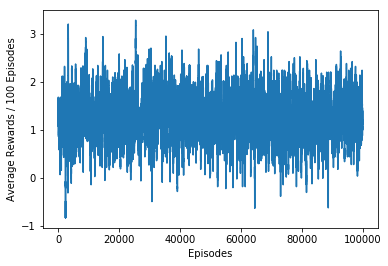

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(avg_rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Rewards / 100 Episodes')